# Convolutional Neural Network Training

Author: Zhongyi (James) Guo, Tiankai Yan <br>
Date: 11/07/2024

## Import Packages

In [1]:
# system
import os
import pickle
import gzip

# data manipulation
import pandas as pd
import numpy as np

# deep learning
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2024-11-15 06:23:35.474182: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 06:23:35.491179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 06:23:35.511644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 06:23:35.517705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 06:23:35.532476: I tensorflow/core/platform/cpu_feature_guar

2024-11-15 06:23:36.557819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.getcwd()

'/home/ubuntu/SCA-DL-DGE/script/cnn'

## Import Dataset

In [3]:
with gzip.open('../../result/one_hot_encoding/gene_id_label_ohe.pkl.gz', 'rb') as f:
    data = pickle.load(f)

In [4]:
data

,ensembl_gene_id,DE,upstream_region_encoded
0,ENSG00000000457,0,"[[1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0,..."
1,ENSG00000000460,0,"[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0,..."
2,ENSG00000000938,0,"[[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [1,..."
3,ENSG00000000971,1,"[[0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0,..."
4,ENSG00000001460,0,"[[0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0,..."
...,...,...,...
55221,ENSG00000284520,0,"[[0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1,..."
55222,ENSG00000284544,0,"[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1,..."
55223,ENSG00000284554,0,"[[1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0,..."
55224,ENSG00000284568,0,"[[1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0,..."


## Quality Control

In [5]:
X = np.stack(data['upstream_region_encoded'].values)
Y = data['DE'].values

In [6]:
print(X.shape)
print(Y.shape)

(55223, 2000, 4)
(55223,)


In [7]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
data['DE'].value_counts()

DE
0    51097
1     4126
Name: count, dtype: int64

The labels are imbalanced.

## Train-test Split

In [9]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123)

In [10]:
print(X_train.shape)
print(X_dev.shape)
print(Y_train.shape)
print(Y_dev.shape)

(44178, 2000, 4)
(11045, 2000, 4)
(44178,)
(11045,)


We need to add one more channel to train CNN.

In [11]:
X_train = np.expand_dims(X_train, axis=-1)
X_dev = np.expand_dims(X_dev, axis=-1) 

In [12]:
print(X_train.shape)
print(X_dev.shape)
print(Y_train.shape)
print(Y_dev.shape)

(44178, 2000, 4, 1)
(11045, 2000, 4, 1)
(44178,)
(11045,)


Hyperparameters:

In [13]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256
EPOCH_SIZE = 20

Shuffle the dataset and apply mini-batch gradient descent with a batch size of 256:

In [14]:
train = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dev = tf.data.Dataset.from_tensor_slices((X_dev, Y_dev)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

I0000 00:00:1731651829.356503    4704 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


I0000 00:00:1731651829.410287    4704 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731651829.413541    4704 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731651829.417351    4704 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731651829.420379    4704 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [15]:
for batch in train.take(1):  
    X_batch, Y_batch = batch
    print("X_batch:", X_batch.shape) 
    print("Y_batch:", Y_batch.shape)

X_batch: (256, 2000, 4, 1)
Y_batch: (256,)


2024-11-15 06:23:56.226699: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
num_batches = 0
for _ in train:
    num_batches += 1
print("Number of mini-batches:", num_batches)

Number of mini-batches: 173


2024-11-15 06:23:56.819667: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Model Building

In [17]:
model = models.Sequential()
model.add(layers.Input(shape=(2000, 4, 1), batch_size = BATCH_SIZE))
# Batch normalization (optional)
model.add(layers.Conv2D(16, (2, 2), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
# Batch normalization (optional)
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model = models.Sequential()
# model.add(layers.Input(shape=(2000, 4, 1), batch_size=BATCH_SIZE))
# model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2), padding='same'))

# model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2), padding='same'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2), padding='same'))
# model.add(layers.Dropout(0.5))

# model.add(layers.GlobalMaxPooling2D())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (256, 2000, 4, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (256, 1000, 2, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (256, 1000, 2, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (256, 500, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (256, 32)              │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (256, 64)              │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (256, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,337 (16.94 KB)

 Trainable params: 4,337 (16.94 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model Fitting

In [20]:
history = model.fit(
    train,                  
    epochs=EPOCH_SIZE,        
    validation_data=dev,
    verbose = 1
)

Epoch 1/20


I0000 00:00:1731651838.811122    4828 service.cc:146] XLA service 0x7773c0015d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731651838.811164    4828 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-11-15 06:23:58.842107: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


2024-11-15 06:23:59.031641: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


I0000 00:00:1731651841.103357    4828 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  1/173 ━━━━━━━━━━━━━━━━━━━━ 10:20 4s/step - accuracy: 0.8477 - loss: 0.6886

  2/173 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8643 - loss: 0.6799

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.8859 - loss: 0.6616

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.8765 - loss: 0.6616

  5/173 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.8922 - loss: 0.6444

  6/173 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - accuracy: 0.8970 - loss: 0.6364

  7/173 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.9002 - loss: 0.6290

  8/173 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9023 - loss: 0.6221

  9/173 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.9035 - loss: 0.6221

 10/173 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.9046 - loss: 0.6085

 11/173 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.9057 - loss: 0.5953

 12/173 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9067 - loss: 0.5953

 14/173 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9086 - loss: 0.5888

 15/173 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9094 - loss: 0.5826

 16/173 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9100 - loss: 0.5766

 17/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9106 - loss: 0.5651

 18/173 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9112 - loss: 0.5651

 19/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9118 - loss: 0.5595

 20/173 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.9123 - loss: 0.5489

 21/173 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9128 - loss: 0.5389

 22/173 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9132 - loss: 0.5389

 23/173 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9135 - loss: 0.5389

 24/173 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9138 - loss: 0.5297

 25/173 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.9141 - loss: 0.5254

 27/173 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.9146 - loss: 0.5130

 28/173 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9148 - loss: 0.5130

 29/173 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9150 - loss: 0.5092

 30/173 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.9152 - loss: 0.5092

 31/173 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.9153 - loss: 0.5055

 32/173 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.9155 - loss: 0.4985

 33/173 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.9156 - loss: 0.4951

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.9158 - loss: 0.4918

 35/173 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.9160 - loss: 0.4918

 36/173 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.9161 - loss: 0.4886

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.9162 - loss: 0.4854

 38/173 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.9164 - loss: 0.4794

 39/173 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.9165 - loss: 0.4737

 42/173 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.9170 - loss: 0.4710

 44/173 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9172 - loss: 0.4657

 45/173 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.9173 - loss: 0.4584

 46/173 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.9175 - loss: 0.4560

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.9177 - loss: 0.4538

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.9179 - loss: 0.4495

 51/173 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.9180 - loss: 0.4475

 52/173 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.9181 - loss: 0.4475

 53/173 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.9182 - loss: 0.4455

 54/173 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.9182 - loss: 0.4435

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.9184 - loss: 0.4397

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.9185 - loss: 0.4361

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.9186 - loss: 0.4361

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.9187 - loss: 0.4343

 60/173 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.9187 - loss: 0.4310

 61/173 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.9188 - loss: 0.4293

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9189 - loss: 0.4232

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9190 - loss: 0.4232

 67/173 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9193 - loss: 0.4189

 68/173 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9194 - loss: 0.4163

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.9195 - loss: 0.4137

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.9195 - loss: 0.4137

 73/173 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.9196 - loss: 0.4113

 74/173 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.9197 - loss: 0.4089

 75/173 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.9197 - loss: 0.4078

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9198 - loss: 0.4035

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9198 - loss: 0.3986

 81/173 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9200 - loss: 0.3968

 82/173 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9200 - loss: 0.3959

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9201 - loss: 0.3959

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9201 - loss: 0.3951

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9201 - loss: 0.3934

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9201 - loss: 0.3926

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9202 - loss: 0.3910

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9202 - loss: 0.3902

 90/173 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9202 - loss: 0.3902

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9202 - loss: 0.3879

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9202 - loss: 0.3879

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9203 - loss: 0.3864

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9203 - loss: 0.3864

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9203 - loss: 0.3850

 97/173 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9203 - loss: 0.3850

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9203 - loss: 0.3843 

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9203 - loss: 0.3829

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9204 - loss: 0.3829

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9204 - loss: 0.3822

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9204 - loss: 0.3816

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.9204 - loss: 0.3802

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.9204 - loss: 0.3802

105/173 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.9205 - loss: 0.3783

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9205 - loss: 0.3764

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9206 - loss: 0.3752

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9206 - loss: 0.3746

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9207 - loss: 0.3718

112/173 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9207 - loss: 0.3718

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9207 - loss: 0.3712

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.9208 - loss: 0.3685

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9209 - loss: 0.3680

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9209 - loss: 0.3680

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9209 - loss: 0.3675

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9209 - loss: 0.3670

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9209 - loss: 0.3660

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9210 - loss: 0.3660

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9210 - loss: 0.3650

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9210 - loss: 0.3640

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9211 - loss: 0.3631

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9211 - loss: 0.3626

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9211 - loss: 0.3617

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9212 - loss: 0.3608

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9212 - loss: 0.3604

135/173 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9212 - loss: 0.3600

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9212 - loss: 0.3600

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9212 - loss: 0.3591

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9213 - loss: 0.3583

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9213 - loss: 0.3579

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9214 - loss: 0.3567

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9213 - loss: 0.3567

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9214 - loss: 0.3555

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9214 - loss: 0.3552

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9214 - loss: 0.3548

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9214 - loss: 0.3541

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9215 - loss: 0.3537

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9215 - loss: 0.3533

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9215 - loss: 0.3533

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9215 - loss: 0.3530

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9215 - loss: 0.3526

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9215 - loss: 0.3520

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9215 - loss: 0.3520

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9215 - loss: 0.3513

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9216 - loss: 0.3506

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9216 - loss: 0.3503

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9216 - loss: 0.3496

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9216 - loss: 0.3500

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9216 - loss: 0.3490

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9216 - loss: 0.3490

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9216 - loss: 0.3480

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9217 - loss: 0.3477

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9217 - loss: 0.3480

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9217 - loss: 0.3477

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9217 - loss: 0.3474

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9217 - loss: 0.3471

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9217 - loss: 0.3465

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9217 - loss: 0.3465

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9217 - loss: 0.3462

173/173 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9217 - loss: 0.3459 - val_accuracy: 0.9290 - val_loss: 0.2562


Epoch 2/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 34s 202ms/step - accuracy: 0.9219 - loss: 0.2748

  2/173 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.9199 - loss: 0.2794

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9201 - loss: 0.2776

  5/173 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.9213 - loss: 0.2763

  6/173 ━━━━━━━━━━━━━━━━━━━━ 26s 157ms/step - accuracy: 0.9213 - loss: 0.2763

  7/173 ━━━━━━━━━━━━━━━━━━━━ 25s 152ms/step - accuracy: 0.9216 - loss: 0.2744

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9220 - loss: 0.2744

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9220 - loss: 0.2736

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.9225 - loss: 0.2729

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.9226 - loss: 0.2723

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9227 - loss: 0.2725

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9228 - loss: 0.2723

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9230 - loss: 0.2718

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9231 - loss: 0.2716

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9231 - loss: 0.2716

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9231 - loss: 0.2715

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9232 - loss: 0.2712

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.9232 - loss: 0.2711

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9233 - loss: 0.2708

 23/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9234 - loss: 0.2707

 24/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9234 - loss: 0.2709

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.9233 - loss: 0.2710

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9233 - loss: 0.2710

 28/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9233 - loss: 0.2711

 29/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9232 - loss: 0.2711

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9231 - loss: 0.2714

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9231 - loss: 0.2716

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9230 - loss: 0.2716

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9230 - loss: 0.2716

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9230 - loss: 0.2716

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9230 - loss: 0.2717

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9230 - loss: 0.2718

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9229 - loss: 0.2718

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.9229 - loss: 0.2718

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9229 - loss: 0.2720

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9228 - loss: 0.2721

 43/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9228 - loss: 0.2722

 45/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9227 - loss: 0.2723

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9227 - loss: 0.2724

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9227 - loss: 0.2724

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9227 - loss: 0.2724

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9226 - loss: 0.2725

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9226 - loss: 0.2725

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9226 - loss: 0.2725

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9226 - loss: 0.2726

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.9226 - loss: 0.2727

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9226 - loss: 0.2727

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9225 - loss: 0.2728

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9225 - loss: 0.2728

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9225 - loss: 0.2729

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9224 - loss: 0.2729

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9224 - loss: 0.2729

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9224 - loss: 0.2730

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9224 - loss: 0.2730

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9224 - loss: 0.2730

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9224 - loss: 0.2731

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9223 - loss: 0.2732

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9223 - loss: 0.2732

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9223 - loss: 0.2732

 73/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9223 - loss: 0.2732

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9223 - loss: 0.2733

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9223 - loss: 0.2733

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9223 - loss: 0.2733

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9223 - loss: 0.2733

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9223 - loss: 0.2734

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9222 - loss: 0.2734

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9222 - loss: 0.2734

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9222 - loss: 0.2734

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9222 - loss: 0.2734

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9222 - loss: 0.2735

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9222 - loss: 0.2735

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9222 - loss: 0.2735

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9222 - loss: 0.2735 

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9222 - loss: 0.2735

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9222 - loss: 0.2736 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9222 - loss: 0.2736 

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9221 - loss: 0.2736

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9221 - loss: 0.2736

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9221 - loss: 0.2736

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9221 - loss: 0.2737

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9221 - loss: 0.2737

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9221 - loss: 0.2737

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9221 - loss: 0.2737

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9221 - loss: 0.2738

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9221 - loss: 0.2738

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9221 - loss: 0.2738

112/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9221 - loss: 0.2738

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9221 - loss: 0.2738

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9221 - loss: 0.2738

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9221 - loss: 0.2738

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9221 - loss: 0.2738

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9221 - loss: 0.2738

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9221 - loss: 0.2738

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9221 - loss: 0.2738

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9221 - loss: 0.2738

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9221 - loss: 0.2738

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9221 - loss: 0.2737

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9221 - loss: 0.2737

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9221 - loss: 0.2737

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9221 - loss: 0.2737

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9221 - loss: 0.2737

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9221 - loss: 0.2736

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9221 - loss: 0.2736

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9221 - loss: 0.2736

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9221 - loss: 0.2736

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9221 - loss: 0.2736

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9221 - loss: 0.2736

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9221 - loss: 0.2735

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9222 - loss: 0.2735

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9222 - loss: 0.2735

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9222 - loss: 0.2735

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9222 - loss: 0.2734

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9222 - loss: 0.2734

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9222 - loss: 0.2734

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9222 - loss: 0.2734

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9222 - loss: 0.2734

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9222 - loss: 0.2734

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9222 - loss: 0.2734

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9222 - loss: 0.2734

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9222 - loss: 0.2734

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9222 - loss: 0.2733

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9222 - loss: 0.2733

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9223 - loss: 0.2732

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9223 - loss: 0.2732

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9223 - loss: 0.2731

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9223 - loss: 0.2731

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9223 - loss: 0.2731

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9223 - loss: 0.2730

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9224 - loss: 0.2730

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9224 - loss: 0.2729

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9224 - loss: 0.2729 - val_accuracy: 0.9290 - val_loss: 0.2579


Epoch 3/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 186ms/step - accuracy: 0.9258 - loss: 0.2669

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9297 - loss: 0.2559

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9323 - loss: 0.2491

  4/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9321 - loss: 0.2491

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9316 - loss: 0.2529

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9308 - loss: 0.2529

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9297 - loss: 0.2558

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9289 - loss: 0.2593

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9284 - loss: 0.2593

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9281 - loss: 0.2611

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9275 - loss: 0.2621

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9274 - loss: 0.2625

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9272 - loss: 0.2629

 15/173 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9270 - loss: 0.2632

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9269 - loss: 0.2632

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9269 - loss: 0.2632

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9268 - loss: 0.2633

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9269 - loss: 0.2633

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9268 - loss: 0.2635

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9267 - loss: 0.2635

 24/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9266 - loss: 0.2637

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9266 - loss: 0.2638

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9266 - loss: 0.2638

 28/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9265 - loss: 0.2640

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2641

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2642

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2643

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9263 - loss: 0.2643

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2646

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9262 - loss: 0.2648

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9260 - loss: 0.2649

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9260 - loss: 0.2650

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9259 - loss: 0.2652

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9259 - loss: 0.2653

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9259 - loss: 0.2654

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9258 - loss: 0.2655

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9258 - loss: 0.2655

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9257 - loss: 0.2656

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9257 - loss: 0.2656

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9257 - loss: 0.2656

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9257 - loss: 0.2656

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9257 - loss: 0.2656

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9256 - loss: 0.2657

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9255 - loss: 0.2660

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9255 - loss: 0.2660

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9255 - loss: 0.2661

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9254 - loss: 0.2662

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9254 - loss: 0.2664

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9253 - loss: 0.2664

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9253 - loss: 0.2665

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9252 - loss: 0.2667

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9252 - loss: 0.2667

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9252 - loss: 0.2668

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9252 - loss: 0.2669

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9251 - loss: 0.2669

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9251 - loss: 0.2670

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9251 - loss: 0.2670

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.9250 - loss: 0.2672

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9250 - loss: 0.2671

 74/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9250 - loss: 0.2673

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9249 - loss: 0.2673

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9249 - loss: 0.2674

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9249 - loss: 0.2675

 81/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9249 - loss: 0.2675

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9248 - loss: 0.2676

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9248 - loss: 0.2676

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9248 - loss: 0.2676

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9247 - loss: 0.2678

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9247 - loss: 0.2678

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9247 - loss: 0.2679

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9246 - loss: 0.2680

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9246 - loss: 0.2680

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9246 - loss: 0.2681

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9246 - loss: 0.2682

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9245 - loss: 0.2682

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9245 - loss: 0.2683 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9245 - loss: 0.2684

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9245 - loss: 0.2684

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9245 - loss: 0.2685

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9244 - loss: 0.2685

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9244 - loss: 0.2685

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9244 - loss: 0.2685

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9244 - loss: 0.2687

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2688

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2688

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2688

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2689

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2689

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2689

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2690

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2690

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2691

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9242 - loss: 0.2691

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9242 - loss: 0.2692

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9241 - loss: 0.2693

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9241 - loss: 0.2693

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9241 - loss: 0.2693

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9241 - loss: 0.2694

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9241 - loss: 0.2694

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9240 - loss: 0.2694

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9240 - loss: 0.2694

127/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9240 - loss: 0.2695

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9240 - loss: 0.2695

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9240 - loss: 0.2695

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9240 - loss: 0.2695

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9240 - loss: 0.2695

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9240 - loss: 0.2695

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9240 - loss: 0.2696

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9240 - loss: 0.2696

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9240 - loss: 0.2696

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9240 - loss: 0.2696

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9240 - loss: 0.2696

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9239 - loss: 0.2696

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9239 - loss: 0.2696

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9239 - loss: 0.2696

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9239 - loss: 0.2697

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9239 - loss: 0.2697

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9239 - loss: 0.2697

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9239 - loss: 0.2697

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9239 - loss: 0.2697

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9239 - loss: 0.2697

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9239 - loss: 0.2697

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9239 - loss: 0.2697

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9239 - loss: 0.2697

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2697

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2697

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2697

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2697

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9239 - loss: 0.2697

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9239 - loss: 0.2697

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2696

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2696

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9239 - loss: 0.2696

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2696

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2696

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9239 - loss: 0.2696 - val_accuracy: 0.9290 - val_loss: 0.2559


Epoch 4/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - accuracy: 0.9336 - loss: 0.2444

  2/173 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - accuracy: 0.9287 - loss: 0.2616

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9269 - loss: 0.2710

  5/173 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.9207 - loss: 0.2791

  6/173 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.9199 - loss: 0.2808

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.9193 - loss: 0.2817

  9/173 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9187 - loss: 0.2820

 10/173 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9188 - loss: 0.2813

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.9193 - loss: 0.2809

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9197 - loss: 0.2793

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9205 - loss: 0.2783

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9200 - loss: 0.2774

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9212 - loss: 0.2766

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9209 - loss: 0.2766

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9215 - loss: 0.2759

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9217 - loss: 0.2753

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9219 - loss: 0.2749

 21/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9221 - loss: 0.2743

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9222 - loss: 0.2740

 23/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9223 - loss: 0.2740

 24/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9224 - loss: 0.2737

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9224 - loss: 0.2736

 28/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9225 - loss: 0.2733

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9225 - loss: 0.2733

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9226 - loss: 0.2732

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9226 - loss: 0.2732

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9227 - loss: 0.2731

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9227 - loss: 0.2728

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9228 - loss: 0.2727

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9229 - loss: 0.2726

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9229 - loss: 0.2725

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9229 - loss: 0.2724

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9229 - loss: 0.2723

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9230 - loss: 0.2723

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9230 - loss: 0.2721

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9231 - loss: 0.2721

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9231 - loss: 0.2720

 44/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9231 - loss: 0.2718

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2718

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2717

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2717

 50/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9232 - loss: 0.2717

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9232 - loss: 0.2718

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2718

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2718

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2718

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9231 - loss: 0.2719

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9231 - loss: 0.2719

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9231 - loss: 0.2719

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9231 - loss: 0.2719

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9231 - loss: 0.2719

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9231 - loss: 0.2718

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9231 - loss: 0.2718

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9231 - loss: 0.2716

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9232 - loss: 0.2716

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9232 - loss: 0.2715

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9232 - loss: 0.2715

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9232 - loss: 0.2715

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9232 - loss: 0.2714

 81/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9232 - loss: 0.2714

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2714

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2714

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9233 - loss: 0.2714

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2713

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2713

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9233 - loss: 0.2713

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2713

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2713 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2712

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2712

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2712

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2712

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2712

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9233 - loss: 0.2712

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9233 - loss: 0.2711

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2711

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2711

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2710

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9234 - loss: 0.2710

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9234 - loss: 0.2710

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9234 - loss: 0.2710

112/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9234 - loss: 0.2710

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9234 - loss: 0.2710

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9234 - loss: 0.2710

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9234 - loss: 0.2709

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9234 - loss: 0.2709

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9234 - loss: 0.2709

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9234 - loss: 0.2708

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9234 - loss: 0.2708

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9234 - loss: 0.2708

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9235 - loss: 0.2707

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9234 - loss: 0.2707

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9235 - loss: 0.2706

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9235 - loss: 0.2706

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9235 - loss: 0.2706

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9235 - loss: 0.2705

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9235 - loss: 0.2705

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9236 - loss: 0.2705

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9236 - loss: 0.2705

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9236 - loss: 0.2704

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9236 - loss: 0.2704

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9236 - loss: 0.2704

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9236 - loss: 0.2703

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9236 - loss: 0.2703

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9236 - loss: 0.2703

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9237 - loss: 0.2702

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9236 - loss: 0.2702

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9237 - loss: 0.2702

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9237 - loss: 0.2701

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9237 - loss: 0.2701

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9237 - loss: 0.2701

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9237 - loss: 0.2701

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9237 - loss: 0.2701

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9237 - loss: 0.2700

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9237 - loss: 0.2700

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9237 - loss: 0.2700

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9237 - loss: 0.2700

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9237 - loss: 0.2699

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9238 - loss: 0.2699

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9238 - loss: 0.2699

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9238 - loss: 0.2699

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9238 - loss: 0.2699

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9238 - loss: 0.2699

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9238 - loss: 0.2699

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9238 - loss: 0.2698

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9238 - loss: 0.2698

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9238 - loss: 0.2698

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9238 - loss: 0.2698

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9238 - loss: 0.2698

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9238 - loss: 0.2698 - val_accuracy: 0.9290 - val_loss: 0.2558


Epoch 5/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.9414 - loss: 0.2229

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9326 - loss: 0.2463

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9277 - loss: 0.2662

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9250 - loss: 0.2729

  7/173 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - accuracy: 0.9217 - loss: 0.2767

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9225 - loss: 0.2749

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9209 - loss: 0.2783

  9/173 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.9204 - loss: 0.2775

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9209 - loss: 0.2771

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9210 - loss: 0.2768

 14/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9211 - loss: 0.2761

 16/173 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9214 - loss: 0.2760

 17/173 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9214 - loss: 0.2759

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9214 - loss: 0.2756

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9215 - loss: 0.2756

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9218 - loss: 0.2749

 21/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9217 - loss: 0.2749

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9218 - loss: 0.2748

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9218 - loss: 0.2747

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9218 - loss: 0.2747

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9219 - loss: 0.2745

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9219 - loss: 0.2745

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9220 - loss: 0.2742

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9220 - loss: 0.2742

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9221 - loss: 0.2741

 31/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9221 - loss: 0.2738

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9223 - loss: 0.2734

 36/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9225 - loss: 0.2727

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9225 - loss: 0.2727

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9226 - loss: 0.2727

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9227 - loss: 0.2723

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9228 - loss: 0.2723

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9228 - loss: 0.2722

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9228 - loss: 0.2721

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9229 - loss: 0.2720

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9229 - loss: 0.2720

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9229 - loss: 0.2719

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9229 - loss: 0.2719

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9229 - loss: 0.2719

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9229 - loss: 0.2719

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9229 - loss: 0.2718

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9229 - loss: 0.2718

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9229 - loss: 0.2718

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9229 - loss: 0.2718

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9229 - loss: 0.2718

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9229 - loss: 0.2718

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9229 - loss: 0.2717

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9230 - loss: 0.2717

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9230 - loss: 0.2717

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9230 - loss: 0.2716

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9230 - loss: 0.2716

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9230 - loss: 0.2715

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9231 - loss: 0.2715

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9230 - loss: 0.2715

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9231 - loss: 0.2714

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9231 - loss: 0.2714

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9231 - loss: 0.2714

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9231 - loss: 0.2714

 73/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9231 - loss: 0.2713

 74/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9231 - loss: 0.2713

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9231 - loss: 0.2713

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9231 - loss: 0.2712

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9232 - loss: 0.2712

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9232 - loss: 0.2712

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9232 - loss: 0.2711

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2711

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2711

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2710

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2710

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2710

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2710

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9232 - loss: 0.2710

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9233 - loss: 0.2709

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2709

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2708

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2708

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2707

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9234 - loss: 0.2706

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9234 - loss: 0.2706

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9234 - loss: 0.2706 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9234 - loss: 0.2705

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9234 - loss: 0.2705

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9234 - loss: 0.2705

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9234 - loss: 0.2704

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9235 - loss: 0.2704

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9235 - loss: 0.2703

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9235 - loss: 0.2703

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9235 - loss: 0.2703

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9235 - loss: 0.2703

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9235 - loss: 0.2702

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9235 - loss: 0.2702

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9235 - loss: 0.2702

112/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9236 - loss: 0.2701

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9236 - loss: 0.2700

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9236 - loss: 0.2700

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9236 - loss: 0.2700

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9236 - loss: 0.2699

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9236 - loss: 0.2699

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9236 - loss: 0.2699

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2699

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2699

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2698

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2698

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2698

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2698

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9237 - loss: 0.2698

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9237 - loss: 0.2697

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9237 - loss: 0.2697

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9237 - loss: 0.2697

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9237 - loss: 0.2696

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9237 - loss: 0.2696

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9238 - loss: 0.2696

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9238 - loss: 0.2696

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9238 - loss: 0.2696

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9238 - loss: 0.2696

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9238 - loss: 0.2695

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9238 - loss: 0.2695

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9238 - loss: 0.2695

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9238 - loss: 0.2695

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9238 - loss: 0.2694

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9238 - loss: 0.2694

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9238 - loss: 0.2694

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9238 - loss: 0.2694

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9238 - loss: 0.2694

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9238 - loss: 0.2694

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9238 - loss: 0.2694

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9238 - loss: 0.2693

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9238 - loss: 0.2693

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9239 - loss: 0.2693

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9239 - loss: 0.2693

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9239 - loss: 0.2693

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2693

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2693

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2693

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2693

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9239 - loss: 0.2693

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2692

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2692

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9239 - loss: 0.2692

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9239 - loss: 0.2692

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2692

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9239 - loss: 0.2692

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9239 - loss: 0.2692 - val_accuracy: 0.9290 - val_loss: 0.2556


Epoch 6/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9609 - loss: 0.1753

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9521 - loss: 0.1975

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9460 - loss: 0.2222

  4/173 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9424 - loss: 0.2317

  5/173 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - accuracy: 0.9403 - loss: 0.2317

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9387 - loss: 0.2317

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9371 - loss: 0.2355

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9363 - loss: 0.2376

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9356 - loss: 0.2406

 10/173 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9351 - loss: 0.2433

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.9347 - loss: 0.2448

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9335 - loss: 0.2448

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9329 - loss: 0.2480

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9322 - loss: 0.2493

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9317 - loss: 0.2493

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9312 - loss: 0.2506

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9307 - loss: 0.2527

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9304 - loss: 0.2534

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9301 - loss: 0.2541

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9298 - loss: 0.2541

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9295 - loss: 0.2548

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9293 - loss: 0.2554

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9291 - loss: 0.2565

 25/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9288 - loss: 0.2570

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9287 - loss: 0.2574

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9283 - loss: 0.2578

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9282 - loss: 0.2581

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9281 - loss: 0.2584

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9280 - loss: 0.2590

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9279 - loss: 0.2590

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9278 - loss: 0.2595

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9277 - loss: 0.2595

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9276 - loss: 0.2597

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9275 - loss: 0.2599

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9275 - loss: 0.2601

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9274 - loss: 0.2601

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9274 - loss: 0.2603

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9273 - loss: 0.2604

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9273 - loss: 0.2605

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9273 - loss: 0.2606

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9271 - loss: 0.2611

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9270 - loss: 0.2611

 50/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9270 - loss: 0.2613

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9269 - loss: 0.2613

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9269 - loss: 0.2615

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9268 - loss: 0.2616

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9268 - loss: 0.2620

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9267 - loss: 0.2620

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9267 - loss: 0.2622

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9266 - loss: 0.2623

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9266 - loss: 0.2623

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9265 - loss: 0.2624

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9264 - loss: 0.2627

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9264 - loss: 0.2627

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9263 - loss: 0.2628

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9263 - loss: 0.2630

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9263 - loss: 0.2630

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9263 - loss: 0.2631

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9262 - loss: 0.2633

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9262 - loss: 0.2633

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9262 - loss: 0.2633

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9262 - loss: 0.2633

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9261 - loss: 0.2634

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9261 - loss: 0.2634

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9261 - loss: 0.2635

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9261 - loss: 0.2635

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9261 - loss: 0.2636

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9260 - loss: 0.2636

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9260 - loss: 0.2637

 81/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9260 - loss: 0.2637

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9260 - loss: 0.2637

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9259 - loss: 0.2638

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9259 - loss: 0.2638

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9259 - loss: 0.2638

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9259 - loss: 0.2638

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9259 - loss: 0.2639

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9259 - loss: 0.2639 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9259 - loss: 0.2639 

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9259 - loss: 0.2639

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9259 - loss: 0.2639

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9259 - loss: 0.2639

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9259 - loss: 0.2639

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9259 - loss: 0.2639

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9259 - loss: 0.2639

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9259 - loss: 0.2639

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9259 - loss: 0.2639

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9259 - loss: 0.2639

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9259 - loss: 0.2639

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9259 - loss: 0.2639

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9259 - loss: 0.2640

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9259 - loss: 0.2640

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9259 - loss: 0.2640

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9259 - loss: 0.2640

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9258 - loss: 0.2641

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9258 - loss: 0.2641

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9258 - loss: 0.2641

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9258 - loss: 0.2642

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9258 - loss: 0.2643

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9258 - loss: 0.2643

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9257 - loss: 0.2643

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9257 - loss: 0.2643

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9257 - loss: 0.2643

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9257 - loss: 0.2644

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9257 - loss: 0.2644

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9257 - loss: 0.2645

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9257 - loss: 0.2645

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9256 - loss: 0.2646

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9256 - loss: 0.2646

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9256 - loss: 0.2646

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9256 - loss: 0.2646

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9256 - loss: 0.2647

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9256 - loss: 0.2647

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9256 - loss: 0.2647

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9256 - loss: 0.2647

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9256 - loss: 0.2648

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9255 - loss: 0.2648

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9255 - loss: 0.2648

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9255 - loss: 0.2648

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9255 - loss: 0.2649

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9255 - loss: 0.2649

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9255 - loss: 0.2649

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9255 - loss: 0.2649

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9255 - loss: 0.2649

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9255 - loss: 0.2650

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9255 - loss: 0.2650

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9254 - loss: 0.2650

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9254 - loss: 0.2651

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9254 - loss: 0.2651

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9254 - loss: 0.2651

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2651

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2651

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2651

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2651

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2651

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2652

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9254 - loss: 0.2652

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9254 - loss: 0.2652 - val_accuracy: 0.9290 - val_loss: 0.2555


Epoch 7/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.9492 - loss: 0.2037

  2/173 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - accuracy: 0.9453 - loss: 0.2213

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9423 - loss: 0.2342

  4/173 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9372 - loss: 0.2472

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9321 - loss: 0.2502

  8/173 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.9303 - loss: 0.2536

  9/173 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9296 - loss: 0.2536

 10/173 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9293 - loss: 0.2551

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 142ms/step - accuracy: 0.9291 - loss: 0.2566

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9287 - loss: 0.2566

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9285 - loss: 0.2567

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9285 - loss: 0.2567

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9284 - loss: 0.2570

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9284 - loss: 0.2572

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9282 - loss: 0.2575

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9281 - loss: 0.2581

 19/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9280 - loss: 0.2581

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9279 - loss: 0.2584

 21/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9278 - loss: 0.2589

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9277 - loss: 0.2591

 23/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9276 - loss: 0.2595

 25/173 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.9271 - loss: 0.2609

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9272 - loss: 0.2609

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9268 - loss: 0.2611

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9267 - loss: 0.2615

 31/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9265 - loss: 0.2623

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2623

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2624

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9263 - loss: 0.2625

 36/173 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.9263 - loss: 0.2628

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.9262 - loss: 0.2628

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2628

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9261 - loss: 0.2630

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9261 - loss: 0.2634

 42/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9260 - loss: 0.2634

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9260 - loss: 0.2635

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9259 - loss: 0.2636

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9259 - loss: 0.2636

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9259 - loss: 0.2637

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9258 - loss: 0.2637

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9258 - loss: 0.2638

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9258 - loss: 0.2639

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9258 - loss: 0.2639

 51/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9258 - loss: 0.2639

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9258 - loss: 0.2640

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9258 - loss: 0.2640

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9258 - loss: 0.2640

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9257 - loss: 0.2640

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9257 - loss: 0.2641

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9257 - loss: 0.2643

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9256 - loss: 0.2643

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9256 - loss: 0.2644

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9256 - loss: 0.2644

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9256 - loss: 0.2645

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9255 - loss: 0.2645

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9255 - loss: 0.2646

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9255 - loss: 0.2647

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9254 - loss: 0.2648

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9254 - loss: 0.2649

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9254 - loss: 0.2649

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9254 - loss: 0.2650

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9253 - loss: 0.2651

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9253 - loss: 0.2653

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9252 - loss: 0.2654

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9252 - loss: 0.2654

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9252 - loss: 0.2655

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9252 - loss: 0.2655

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9252 - loss: 0.2655

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9252 - loss: 0.2655

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9251 - loss: 0.2656

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9251 - loss: 0.2656

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9251 - loss: 0.2657

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9251 - loss: 0.2657

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9251 - loss: 0.2657

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9251 - loss: 0.2658

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9251 - loss: 0.2658

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9251 - loss: 0.2658

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9251 - loss: 0.2658

 96/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9251 - loss: 0.2658 

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9250 - loss: 0.2658

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9250 - loss: 0.2659

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9250 - loss: 0.2659

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9250 - loss: 0.2659

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9250 - loss: 0.2660

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9250 - loss: 0.2660

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9250 - loss: 0.2660

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9250 - loss: 0.2661

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9249 - loss: 0.2661

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9249 - loss: 0.2662

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9249 - loss: 0.2662

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9249 - loss: 0.2662

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9249 - loss: 0.2662

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9249 - loss: 0.2663

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9249 - loss: 0.2663

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9249 - loss: 0.2663

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9249 - loss: 0.2663

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9249 - loss: 0.2663

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9249 - loss: 0.2663

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9249 - loss: 0.2664

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9248 - loss: 0.2664

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2664

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9248 - loss: 0.2665

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2665

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2665

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9248 - loss: 0.2666

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9248 - loss: 0.2666

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9248 - loss: 0.2666

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9248 - loss: 0.2666

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9247 - loss: 0.2667

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9247 - loss: 0.2667

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9247 - loss: 0.2667

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2668

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9247 - loss: 0.2668

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9247 - loss: 0.2668

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2668

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2669

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2669

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9247 - loss: 0.2669

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2669

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9246 - loss: 0.2669

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2670

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2670

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2670

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2670

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2670

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2670

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2670

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2670

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2670

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2670

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2671

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2671

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2671

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2671

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9246 - loss: 0.2671

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9246 - loss: 0.2671 - val_accuracy: 0.9290 - val_loss: 0.2554


Epoch 8/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - accuracy: 0.9570 - loss: 0.1845

  2/173 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - accuracy: 0.9512 - loss: 0.1997

  3/173 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.9457 - loss: 0.2286

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9400 - loss: 0.2359

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9352 - loss: 0.2410

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9340 - loss: 0.2440

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9331 - loss: 0.2478

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9325 - loss: 0.2478

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9319 - loss: 0.2493

 11/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9312 - loss: 0.2509

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9309 - loss: 0.2518

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9305 - loss: 0.2534

 14/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9302 - loss: 0.2539

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9299 - loss: 0.2544

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9298 - loss: 0.2544

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9298 - loss: 0.2545

 20/173 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9297 - loss: 0.2546

 21/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9297 - loss: 0.2548

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9296 - loss: 0.2548

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9294 - loss: 0.2553

 23/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9295 - loss: 0.2553

 25/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9293 - loss: 0.2559

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9290 - loss: 0.2562

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9288 - loss: 0.2567

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9288 - loss: 0.2569

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9287 - loss: 0.2572

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9285 - loss: 0.2576

 35/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9284 - loss: 0.2578

 36/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9283 - loss: 0.2580

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9282 - loss: 0.2584

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9281 - loss: 0.2584

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9280 - loss: 0.2586

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9279 - loss: 0.2590

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9279 - loss: 0.2591

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9278 - loss: 0.2593

 43/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9278 - loss: 0.2594

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9277 - loss: 0.2594

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9277 - loss: 0.2594

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9277 - loss: 0.2596

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9276 - loss: 0.2597

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9276 - loss: 0.2598

 50/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9275 - loss: 0.2598

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9275 - loss: 0.2598

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9275 - loss: 0.2599

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9275 - loss: 0.2600

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2600

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2601

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2601

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9274 - loss: 0.2601

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9274 - loss: 0.2602

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9274 - loss: 0.2602

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9273 - loss: 0.2602

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2603

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2603

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2603

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2603

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9273 - loss: 0.2603

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9273 - loss: 0.2603

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9273 - loss: 0.2604

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9273 - loss: 0.2604

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9273 - loss: 0.2604

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9273 - loss: 0.2604

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9273 - loss: 0.2604

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9273 - loss: 0.2604

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9272 - loss: 0.2605

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9272 - loss: 0.2606

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9272 - loss: 0.2606

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9272 - loss: 0.2606

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9271 - loss: 0.2607

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9271 - loss: 0.2608

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9271 - loss: 0.2608

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9271 - loss: 0.2608

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9271 - loss: 0.2608

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9271 - loss: 0.2608

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9271 - loss: 0.2609

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9271 - loss: 0.2609

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9270 - loss: 0.2609 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2610

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2610

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2610

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2610

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2611

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9270 - loss: 0.2611

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9270 - loss: 0.2611

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9270 - loss: 0.2612

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9269 - loss: 0.2612

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9269 - loss: 0.2612

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9269 - loss: 0.2612

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9269 - loss: 0.2613

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9269 - loss: 0.2613

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9269 - loss: 0.2613

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9269 - loss: 0.2613

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9269 - loss: 0.2613

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9269 - loss: 0.2613

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9269 - loss: 0.2613

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9269 - loss: 0.2614

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9269 - loss: 0.2614

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9269 - loss: 0.2614

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9268 - loss: 0.2614

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9268 - loss: 0.2614

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9268 - loss: 0.2614

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9268 - loss: 0.2615

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9268 - loss: 0.2615

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9268 - loss: 0.2616

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9268 - loss: 0.2616

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9268 - loss: 0.2616

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9268 - loss: 0.2616

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9267 - loss: 0.2617

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9267 - loss: 0.2617

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9267 - loss: 0.2617

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9267 - loss: 0.2618

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9267 - loss: 0.2618

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9267 - loss: 0.2618

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9267 - loss: 0.2618

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9267 - loss: 0.2619

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9266 - loss: 0.2619

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9266 - loss: 0.2619

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2620

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2620

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2620

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2621

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2621

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2621

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9265 - loss: 0.2622

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9265 - loss: 0.2622

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9265 - loss: 0.2623

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9265 - loss: 0.2623

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9265 - loss: 0.2623

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9265 - loss: 0.2623

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9264 - loss: 0.2624

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2625

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2625

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2625

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2625

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2626

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9264 - loss: 0.2626

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2627

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2627

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2627

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2628

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2628

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2628

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2628

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9263 - loss: 0.2629 - val_accuracy: 0.9290 - val_loss: 0.2558


Epoch 9/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.9062 - loss: 0.3097

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9076 - loss: 0.3029

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9092 - loss: 0.2995

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9106 - loss: 0.2995

  6/173 ━━━━━━━━━━━━━━━━━━━━ 26s 156ms/step - accuracy: 0.9115 - loss: 0.2969

  7/173 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - accuracy: 0.9117 - loss: 0.2967

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.9126 - loss: 0.2945

 10/173 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9124 - loss: 0.2951

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9133 - loss: 0.2930

 12/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9128 - loss: 0.2945

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9135 - loss: 0.2930

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9137 - loss: 0.2919

 15/173 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.9138 - loss: 0.2919

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9140 - loss: 0.2919

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9140 - loss: 0.2917

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9141 - loss: 0.2916

 20/173 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9141 - loss: 0.2916

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9141 - loss: 0.2916

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9142 - loss: 0.2914

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9143 - loss: 0.2912

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9144 - loss: 0.2907

 25/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9145 - loss: 0.2907

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9147 - loss: 0.2903

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9146 - loss: 0.2903

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9148 - loss: 0.2898

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9149 - loss: 0.2898

 30/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9151 - loss: 0.2890

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9152 - loss: 0.2890

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9153 - loss: 0.2888

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9154 - loss: 0.2885

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9154 - loss: 0.2883

 36/173 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.9155 - loss: 0.2881

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9158 - loss: 0.2871

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9160 - loss: 0.2871

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9160 - loss: 0.2867

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9162 - loss: 0.2865

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9163 - loss: 0.2865

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9163 - loss: 0.2864

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9164 - loss: 0.2862

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9165 - loss: 0.2858

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9166 - loss: 0.2855

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9168 - loss: 0.2852

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9168 - loss: 0.2851

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9169 - loss: 0.2849

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9170 - loss: 0.2849

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9170 - loss: 0.2848

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9171 - loss: 0.2846

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9171 - loss: 0.2843

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9172 - loss: 0.2840

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9173 - loss: 0.2840

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9173 - loss: 0.2840

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9174 - loss: 0.2837

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9174 - loss: 0.2837

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9175 - loss: 0.2835

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9176 - loss: 0.2832

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9177 - loss: 0.2829

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9178 - loss: 0.2829

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9179 - loss: 0.2826

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9179 - loss: 0.2825

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9181 - loss: 0.2821

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9181 - loss: 0.2820

 74/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9182 - loss: 0.2818

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9184 - loss: 0.2814

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9185 - loss: 0.2812

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9185 - loss: 0.2810

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9186 - loss: 0.2809

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9187 - loss: 0.2806

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9188 - loss: 0.2805

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9187 - loss: 0.2805

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9189 - loss: 0.2802

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9189 - loss: 0.2800

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9190 - loss: 0.2799

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9191 - loss: 0.2798

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9191 - loss: 0.2796

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9192 - loss: 0.2795

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9192 - loss: 0.2794

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9193 - loss: 0.2792

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9193 - loss: 0.2791

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9195 - loss: 0.2787 

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9195 - loss: 0.2787

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9196 - loss: 0.2787

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9196 - loss: 0.2786

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9197 - loss: 0.2783

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9197 - loss: 0.2782

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9198 - loss: 0.2781

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9198 - loss: 0.2779

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9199 - loss: 0.2778

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9199 - loss: 0.2778

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9199 - loss: 0.2776

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9200 - loss: 0.2775

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9201 - loss: 0.2773

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9202 - loss: 0.2772

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9203 - loss: 0.2770

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9203 - loss: 0.2768

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9204 - loss: 0.2767

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9204 - loss: 0.2766

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9205 - loss: 0.2765

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9205 - loss: 0.2763

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9205 - loss: 0.2763

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9205 - loss: 0.2763

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9206 - loss: 0.2763

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9206 - loss: 0.2762

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9206 - loss: 0.2761

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9206 - loss: 0.2760

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9206 - loss: 0.2760

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9207 - loss: 0.2760

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9207 - loss: 0.2758

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9207 - loss: 0.2758

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9208 - loss: 0.2757

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9208 - loss: 0.2757

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9208 - loss: 0.2755

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9209 - loss: 0.2755

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9209 - loss: 0.2754

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9209 - loss: 0.2754

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9209 - loss: 0.2753

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9210 - loss: 0.2752

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9210 - loss: 0.2751

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9211 - loss: 0.2750

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9211 - loss: 0.2750

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9211 - loss: 0.2749

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9211 - loss: 0.2749

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9211 - loss: 0.2748

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9212 - loss: 0.2748

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9212 - loss: 0.2747

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9212 - loss: 0.2747

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9212 - loss: 0.2746

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9212 - loss: 0.2746

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9213 - loss: 0.2745

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9213 - loss: 0.2745

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9213 - loss: 0.2745

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9213 - loss: 0.2744

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9213 - loss: 0.2743

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9214 - loss: 0.2743

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9214 - loss: 0.2743

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9214 - loss: 0.2743

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9214 - loss: 0.2742

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9214 - loss: 0.2741

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9215 - loss: 0.2741

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9215 - loss: 0.2741 - val_accuracy: 0.9290 - val_loss: 0.2549


Epoch 10/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.9258 - loss: 0.2631

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9268 - loss: 0.2604

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9260 - loss: 0.2622

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9242 - loss: 0.2645

  5/173 ━━━━━━━━━━━━━━━━━━━━ 27s 161ms/step - accuracy: 0.9252 - loss: 0.2620

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9262 - loss: 0.2604

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9269 - loss: 0.2604

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9276 - loss: 0.2586

 10/173 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9283 - loss: 0.2561

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9290 - loss: 0.2552

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9294 - loss: 0.2535

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9298 - loss: 0.2535

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9299 - loss: 0.2531

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9300 - loss: 0.2530

 19/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9301 - loss: 0.2526

 20/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9301 - loss: 0.2525

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9303 - loss: 0.2522

 24/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9303 - loss: 0.2524

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9302 - loss: 0.2524

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9302 - loss: 0.2525

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9302 - loss: 0.2528

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9301 - loss: 0.2528

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9300 - loss: 0.2530

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9299 - loss: 0.2535

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9298 - loss: 0.2535

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9297 - loss: 0.2537

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9297 - loss: 0.2538

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9295 - loss: 0.2543

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9293 - loss: 0.2547

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9293 - loss: 0.2551

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9292 - loss: 0.2553

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9289 - loss: 0.2557

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9289 - loss: 0.2559

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9288 - loss: 0.2563

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9287 - loss: 0.2563

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9286 - loss: 0.2565

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9285 - loss: 0.2569

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9284 - loss: 0.2571

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9283 - loss: 0.2575

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9282 - loss: 0.2575

 52/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9282 - loss: 0.2578

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9281 - loss: 0.2578

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9280 - loss: 0.2582

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9278 - loss: 0.2586

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9278 - loss: 0.2587

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9277 - loss: 0.2588

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9277 - loss: 0.2589

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9276 - loss: 0.2591

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9275 - loss: 0.2593

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9275 - loss: 0.2594

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9274 - loss: 0.2595

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9274 - loss: 0.2596

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9274 - loss: 0.2597

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9273 - loss: 0.2599

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2600

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9274 - loss: 0.2597

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2600

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9272 - loss: 0.2601

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9272 - loss: 0.2602

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9271 - loss: 0.2602

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9271 - loss: 0.2603

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9271 - loss: 0.2605

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9270 - loss: 0.2605

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9270 - loss: 0.2606

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2607

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9269 - loss: 0.2610

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9269 - loss: 0.2610

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9268 - loss: 0.2611

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9268 - loss: 0.2611

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9268 - loss: 0.2612

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9267 - loss: 0.2613

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9267 - loss: 0.2613

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9267 - loss: 0.2614

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9266 - loss: 0.2616

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9266 - loss: 0.2616

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9266 - loss: 0.2617

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9266 - loss: 0.2617 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9265 - loss: 0.2617

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9265 - loss: 0.2619

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9265 - loss: 0.2619

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9264 - loss: 0.2620

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9264 - loss: 0.2621

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9264 - loss: 0.2621

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9264 - loss: 0.2621

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9264 - loss: 0.2622

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9264 - loss: 0.2622

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9263 - loss: 0.2622

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9263 - loss: 0.2623

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9263 - loss: 0.2623

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9263 - loss: 0.2623

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9263 - loss: 0.2624

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9263 - loss: 0.2624

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9263 - loss: 0.2624

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9263 - loss: 0.2625

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9262 - loss: 0.2625

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9262 - loss: 0.2625

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9262 - loss: 0.2625

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9262 - loss: 0.2625

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9262 - loss: 0.2626

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9262 - loss: 0.2626

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9262 - loss: 0.2626

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9262 - loss: 0.2627

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9262 - loss: 0.2627

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9262 - loss: 0.2627

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9261 - loss: 0.2628

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9261 - loss: 0.2628

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9261 - loss: 0.2628

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9261 - loss: 0.2628

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9261 - loss: 0.2628

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9261 - loss: 0.2628

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9261 - loss: 0.2629

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9261 - loss: 0.2629

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9261 - loss: 0.2629

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9260 - loss: 0.2629

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9261 - loss: 0.2629

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2630

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2630

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2630

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2630

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2631

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2631

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2631

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9260 - loss: 0.2631

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9260 - loss: 0.2631

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9260 - loss: 0.2632

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9260 - loss: 0.2632

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9259 - loss: 0.2632

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9259 - loss: 0.2632

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9259 - loss: 0.2633

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9259 - loss: 0.2633

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9259 - loss: 0.2633

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9259 - loss: 0.2633

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9259 - loss: 0.2634

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9259 - loss: 0.2634

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9259 - loss: 0.2634

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9259 - loss: 0.2634

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9259 - loss: 0.2634

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9258 - loss: 0.2635

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9258 - loss: 0.2635

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9258 - loss: 0.2635

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9258 - loss: 0.2636

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9258 - loss: 0.2636 - val_accuracy: 0.9290 - val_loss: 0.2557


Epoch 11/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.9336 - loss: 0.2472

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9287 - loss: 0.2579

  3/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9282 - loss: 0.2588

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.9278 - loss: 0.2595

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9273 - loss: 0.2609

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9272 - loss: 0.2609

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9271 - loss: 0.2611

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9269 - loss: 0.2615

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9270 - loss: 0.2608

 11/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9273 - loss: 0.2600

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9275 - loss: 0.2600

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9275 - loss: 0.2599

 14/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9276 - loss: 0.2595

 15/173 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9276 - loss: 0.2595

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9277 - loss: 0.2594

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9277 - loss: 0.2594

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9276 - loss: 0.2596

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9273 - loss: 0.2603

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9275 - loss: 0.2603

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9272 - loss: 0.2610

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9271 - loss: 0.2610

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9270 - loss: 0.2612

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9268 - loss: 0.2615

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9267 - loss: 0.2621

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9266 - loss: 0.2621

 28/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9265 - loss: 0.2626

 29/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9264 - loss: 0.2627

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2627

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9264 - loss: 0.2628

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9264 - loss: 0.2629

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2633

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2633

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2634

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2634

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9262 - loss: 0.2634

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9261 - loss: 0.2635

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9261 - loss: 0.2636

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9261 - loss: 0.2636

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9260 - loss: 0.2638

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9260 - loss: 0.2638

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9260 - loss: 0.2638

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9260 - loss: 0.2639

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9259 - loss: 0.2642

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9259 - loss: 0.2641

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9259 - loss: 0.2642

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9258 - loss: 0.2642

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9258 - loss: 0.2643

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9258 - loss: 0.2643

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9258 - loss: 0.2643

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9258 - loss: 0.2644

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9257 - loss: 0.2645

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9257 - loss: 0.2644

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9257 - loss: 0.2645

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9257 - loss: 0.2646

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9257 - loss: 0.2646

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9257 - loss: 0.2646

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9257 - loss: 0.2646

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9257 - loss: 0.2646

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9256 - loss: 0.2646

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9256 - loss: 0.2646

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9256 - loss: 0.2647

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9256 - loss: 0.2647

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9256 - loss: 0.2648

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9256 - loss: 0.2648

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9255 - loss: 0.2649

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9255 - loss: 0.2649

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9255 - loss: 0.2649

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9255 - loss: 0.2649

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9255 - loss: 0.2650

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9255 - loss: 0.2650

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9254 - loss: 0.2651

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9254 - loss: 0.2651

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9254 - loss: 0.2652

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9254 - loss: 0.2653

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9253 - loss: 0.2653

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9253 - loss: 0.2653

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9253 - loss: 0.2654

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9253 - loss: 0.2654

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9253 - loss: 0.2655 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9253 - loss: 0.2655

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9252 - loss: 0.2656

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9252 - loss: 0.2656

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9252 - loss: 0.2657

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9252 - loss: 0.2657

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9251 - loss: 0.2658

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9251 - loss: 0.2658

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9251 - loss: 0.2658

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9251 - loss: 0.2659

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9251 - loss: 0.2659

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9251 - loss: 0.2660

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9250 - loss: 0.2660

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9250 - loss: 0.2661

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9250 - loss: 0.2661

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9250 - loss: 0.2661

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9250 - loss: 0.2661

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9250 - loss: 0.2661

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9249 - loss: 0.2662

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9249 - loss: 0.2662

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9249 - loss: 0.2662

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9249 - loss: 0.2662

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9249 - loss: 0.2663

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9249 - loss: 0.2663

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9249 - loss: 0.2663

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2664

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2664

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2664

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9248 - loss: 0.2665

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9248 - loss: 0.2665

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9248 - loss: 0.2665

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9247 - loss: 0.2666

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9248 - loss: 0.2666

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9247 - loss: 0.2666

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9247 - loss: 0.2666

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9247 - loss: 0.2667

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9247 - loss: 0.2667

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9247 - loss: 0.2667

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2667

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2667

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9247 - loss: 0.2668

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9247 - loss: 0.2668

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9246 - loss: 0.2668

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9246 - loss: 0.2668

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9246 - loss: 0.2668

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9246 - loss: 0.2668

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2668

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2668

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2668

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2668

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2668

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2669

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2669

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2669

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2669

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2668

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9246 - loss: 0.2668 - val_accuracy: 0.9290 - val_loss: 0.2543


Epoch 12/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - accuracy: 0.9219 - loss: 0.2713

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9238 - loss: 0.2661

  4/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9190 - loss: 0.2780

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9210 - loss: 0.2780

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9191 - loss: 0.2799

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9184 - loss: 0.2799

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9175 - loss: 0.2819

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9171 - loss: 0.2830

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9174 - loss: 0.2825

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9178 - loss: 0.2817

 11/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9178 - loss: 0.2817

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.9179 - loss: 0.2818

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9177 - loss: 0.2828

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9175 - loss: 0.2833

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9174 - loss: 0.2835

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9173 - loss: 0.2835

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9172 - loss: 0.2837

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9172 - loss: 0.2837

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9173 - loss: 0.2835

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9174 - loss: 0.2831

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9175 - loss: 0.2829

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9176 - loss: 0.2829

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9177 - loss: 0.2827

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9178 - loss: 0.2821

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9179 - loss: 0.2821

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9181 - loss: 0.2815

 31/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9184 - loss: 0.2805

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9185 - loss: 0.2802

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9186 - loss: 0.2802

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9188 - loss: 0.2799

 35/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9189 - loss: 0.2792

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9192 - loss: 0.2785

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9193 - loss: 0.2783

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9194 - loss: 0.2783

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9195 - loss: 0.2781

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9196 - loss: 0.2780

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9196 - loss: 0.2776

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9197 - loss: 0.2774

 44/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9198 - loss: 0.2772

 45/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9199 - loss: 0.2770

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9200 - loss: 0.2768

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9201 - loss: 0.2766

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9201 - loss: 0.2766

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9202 - loss: 0.2764

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9203 - loss: 0.2763

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9203 - loss: 0.2762

 52/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9204 - loss: 0.2758

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9205 - loss: 0.2758

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9205 - loss: 0.2758

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9206 - loss: 0.2757

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9206 - loss: 0.2755

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.9207 - loss: 0.2753

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9207 - loss: 0.2753

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9208 - loss: 0.2750

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9207 - loss: 0.2751

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9209 - loss: 0.2748

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9209 - loss: 0.2747

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9208 - loss: 0.2748

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9210 - loss: 0.2746

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9210 - loss: 0.2746

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9211 - loss: 0.2744

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9211 - loss: 0.2743

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9212 - loss: 0.2741

 73/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9213 - loss: 0.2740

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9214 - loss: 0.2736

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9214 - loss: 0.2735

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9215 - loss: 0.2735

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9215 - loss: 0.2733

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9216 - loss: 0.2732

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9216 - loss: 0.2731

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9217 - loss: 0.2729

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9217 - loss: 0.2729

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9217 - loss: 0.2729

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9218 - loss: 0.2728

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9218 - loss: 0.2727

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9218 - loss: 0.2726

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9219 - loss: 0.2725

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9219 - loss: 0.2724

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9219 - loss: 0.2724

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9220 - loss: 0.2723

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9220 - loss: 0.2723

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9220 - loss: 0.2722

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9220 - loss: 0.2722 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9221 - loss: 0.2721

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9221 - loss: 0.2720

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9221 - loss: 0.2720

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9221 - loss: 0.2719

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9221 - loss: 0.2719

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9222 - loss: 0.2718

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9222 - loss: 0.2718

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9222 - loss: 0.2717

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9223 - loss: 0.2716

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9222 - loss: 0.2716

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9223 - loss: 0.2716

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9223 - loss: 0.2715

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9223 - loss: 0.2715

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9223 - loss: 0.2714

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9224 - loss: 0.2714

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9224 - loss: 0.2713

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9224 - loss: 0.2712

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9225 - loss: 0.2711

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9225 - loss: 0.2711

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9225 - loss: 0.2711

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9225 - loss: 0.2710

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9225 - loss: 0.2710

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9225 - loss: 0.2710

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9225 - loss: 0.2710

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9225 - loss: 0.2709

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9226 - loss: 0.2709

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9226 - loss: 0.2709

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9226 - loss: 0.2709

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9226 - loss: 0.2708

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9226 - loss: 0.2708

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9226 - loss: 0.2707

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9226 - loss: 0.2707

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9226 - loss: 0.2707

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9227 - loss: 0.2707

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9227 - loss: 0.2706

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9227 - loss: 0.2705

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9227 - loss: 0.2705

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9227 - loss: 0.2705

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9227 - loss: 0.2704

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9228 - loss: 0.2704

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9228 - loss: 0.2704

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9228 - loss: 0.2704

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9228 - loss: 0.2703

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9228 - loss: 0.2703

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9228 - loss: 0.2702

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9228 - loss: 0.2702

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9229 - loss: 0.2702

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9229 - loss: 0.2702

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9229 - loss: 0.2701

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9229 - loss: 0.2700

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9229 - loss: 0.2700

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9229 - loss: 0.2700

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9229 - loss: 0.2700

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9229 - loss: 0.2699

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9229 - loss: 0.2699

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9230 - loss: 0.2699

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9230 - loss: 0.2699

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9230 - loss: 0.2698

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9230 - loss: 0.2698

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9230 - loss: 0.2698

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9230 - loss: 0.2698

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9230 - loss: 0.2698

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9230 - loss: 0.2697

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9230 - loss: 0.2697

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9230 - loss: 0.2697

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9231 - loss: 0.2697

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9231 - loss: 0.2697 - val_accuracy: 0.9290 - val_loss: 0.2540


Epoch 13/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.9258 - loss: 0.2610

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9268 - loss: 0.2594

  3/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9277 - loss: 0.2573

  4/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9280 - loss: 0.2568

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9289 - loss: 0.2544

  7/173 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - accuracy: 0.9283 - loss: 0.2567

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9280 - loss: 0.2567

  9/173 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9280 - loss: 0.2568

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9280 - loss: 0.2568

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.9278 - loss: 0.2575

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9278 - loss: 0.2575

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9278 - loss: 0.2575

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9278 - loss: 0.2574

 15/173 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9278 - loss: 0.2577

 16/173 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9277 - loss: 0.2577

 19/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9275 - loss: 0.2582

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9274 - loss: 0.2584

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9273 - loss: 0.2587

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9273 - loss: 0.2589

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9273 - loss: 0.2588

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9273 - loss: 0.2589

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9272 - loss: 0.2590

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9272 - loss: 0.2590

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2590

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9272 - loss: 0.2590

 42/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9272 - loss: 0.2590

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9272 - loss: 0.2588

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9273 - loss: 0.2587

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9273 - loss: 0.2587

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9273 - loss: 0.2586

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9274 - loss: 0.2585

 51/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9274 - loss: 0.2585

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9274 - loss: 0.2584

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9274 - loss: 0.2584

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2584

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2584

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2585

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9274 - loss: 0.2585

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9274 - loss: 0.2585

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9274 - loss: 0.2585

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9274 - loss: 0.2585

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9274 - loss: 0.2585

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9274 - loss: 0.2585

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9274 - loss: 0.2585

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9273 - loss: 0.2586

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9273 - loss: 0.2587

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2587

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9273 - loss: 0.2588

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9273 - loss: 0.2588

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9273 - loss: 0.2588

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9272 - loss: 0.2589

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9272 - loss: 0.2589

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9272 - loss: 0.2589

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9272 - loss: 0.2590

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9272 - loss: 0.2591

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9271 - loss: 0.2592

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9271 - loss: 0.2592

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9271 - loss: 0.2593

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9271 - loss: 0.2594

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2594

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9270 - loss: 0.2594

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9270 - loss: 0.2595

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9270 - loss: 0.2595

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9270 - loss: 0.2595

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9270 - loss: 0.2596

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2596 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9270 - loss: 0.2597

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9269 - loss: 0.2597

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9269 - loss: 0.2597

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9269 - loss: 0.2598

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9269 - loss: 0.2598

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9269 - loss: 0.2599

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9269 - loss: 0.2599

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9269 - loss: 0.2600

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9268 - loss: 0.2601

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9268 - loss: 0.2601

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9268 - loss: 0.2602

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9268 - loss: 0.2602

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9267 - loss: 0.2603

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9267 - loss: 0.2603

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9267 - loss: 0.2604

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9267 - loss: 0.2604

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9267 - loss: 0.2604

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9267 - loss: 0.2605

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9267 - loss: 0.2605

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9266 - loss: 0.2605

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9266 - loss: 0.2606

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9266 - loss: 0.2606

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9266 - loss: 0.2606

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9266 - loss: 0.2606

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9266 - loss: 0.2606

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9266 - loss: 0.2606

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9266 - loss: 0.2606

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9266 - loss: 0.2607

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9266 - loss: 0.2607

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9266 - loss: 0.2607

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9266 - loss: 0.2607

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9266 - loss: 0.2608

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9265 - loss: 0.2608

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9265 - loss: 0.2608

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9265 - loss: 0.2608

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9265 - loss: 0.2608

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9265 - loss: 0.2609

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9265 - loss: 0.2609

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9265 - loss: 0.2610

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9265 - loss: 0.2610

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9265 - loss: 0.2610

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9264 - loss: 0.2610

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9264 - loss: 0.2610

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9264 - loss: 0.2611

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9264 - loss: 0.2611

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9264 - loss: 0.2611

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9264 - loss: 0.2611

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9264 - loss: 0.2612

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9264 - loss: 0.2612

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9264 - loss: 0.2613

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9263 - loss: 0.2613

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9263 - loss: 0.2613

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9263 - loss: 0.2613

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9263 - loss: 0.2614

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9263 - loss: 0.2614

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2614

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9263 - loss: 0.2615

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9262 - loss: 0.2616

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9262 - loss: 0.2616

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9262 - loss: 0.2616 - val_accuracy: 0.9290 - val_loss: 0.2569


Epoch 14/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.9141 - loss: 0.2900

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9141 - loss: 0.2903

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9145 - loss: 0.2863

  4/173 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9159 - loss: 0.2823

  6/173 ━━━━━━━━━━━━━━━━━━━━ 26s 156ms/step - accuracy: 0.9186 - loss: 0.2784

  7/173 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - accuracy: 0.9192 - loss: 0.2784

  8/173 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.9196 - loss: 0.2780

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9195 - loss: 0.2780

 11/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9196 - loss: 0.2783

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9198 - loss: 0.2779

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9198 - loss: 0.2781

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9198 - loss: 0.2781

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9198 - loss: 0.2781

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9198 - loss: 0.2780

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9198 - loss: 0.2781

 18/173 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9198 - loss: 0.2779

 19/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9199 - loss: 0.2779

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9200 - loss: 0.2776

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9202 - loss: 0.2769

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9203 - loss: 0.2769

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9204 - loss: 0.2766

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9205 - loss: 0.2762

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9206 - loss: 0.2759

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9208 - loss: 0.2754

 30/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9210 - loss: 0.2751

 29/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9209 - loss: 0.2747

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9212 - loss: 0.2745

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9213 - loss: 0.2743

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9214 - loss: 0.2740

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9216 - loss: 0.2729

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9218 - loss: 0.2726

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.9217 - loss: 0.2726

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9219 - loss: 0.2726

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9221 - loss: 0.2722

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9222 - loss: 0.2718

 44/173 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9225 - loss: 0.2708

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9226 - loss: 0.2708

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9227 - loss: 0.2706

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9227 - loss: 0.2703

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9228 - loss: 0.2701

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9228 - loss: 0.2701

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9230 - loss: 0.2699

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9230 - loss: 0.2698

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9230 - loss: 0.2695

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2695

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9232 - loss: 0.2693

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9231 - loss: 0.2693

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9232 - loss: 0.2690

 59/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9233 - loss: 0.2689

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9233 - loss: 0.2687

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9234 - loss: 0.2687

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9234 - loss: 0.2683

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9235 - loss: 0.2683

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9236 - loss: 0.2681

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9236 - loss: 0.2680

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9236 - loss: 0.2680

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9237 - loss: 0.2679

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9237 - loss: 0.2678

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9238 - loss: 0.2675

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9238 - loss: 0.2674

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9239 - loss: 0.2673

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9239 - loss: 0.2673

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9239 - loss: 0.2672

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9239 - loss: 0.2671

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9240 - loss: 0.2671

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9240 - loss: 0.2669

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9240 - loss: 0.2669

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9240 - loss: 0.2668

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9241 - loss: 0.2668

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9241 - loss: 0.2667

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9241 - loss: 0.2667

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9241 - loss: 0.2666

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9241 - loss: 0.2666

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9241 - loss: 0.2666

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9241 - loss: 0.2666

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9242 - loss: 0.2665

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9242 - loss: 0.2665

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9242 - loss: 0.2665

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9242 - loss: 0.2664

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9242 - loss: 0.2664

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9242 - loss: 0.2664 

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9242 - loss: 0.2663

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9242 - loss: 0.2663

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9243 - loss: 0.2662

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9242 - loss: 0.2662

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2662

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2662

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2662

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2661

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2661

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9243 - loss: 0.2661

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9243 - loss: 0.2661

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9243 - loss: 0.2661

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9243 - loss: 0.2660

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9243 - loss: 0.2660

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9243 - loss: 0.2660

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9243 - loss: 0.2660

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9243 - loss: 0.2660

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9243 - loss: 0.2660

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9243 - loss: 0.2660

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9243 - loss: 0.2660

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9243 - loss: 0.2660

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9243 - loss: 0.2660

127/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9243 - loss: 0.2659

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9243 - loss: 0.2659

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9243 - loss: 0.2659

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9243 - loss: 0.2659

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2659

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2659

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9244 - loss: 0.2659

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9244 - loss: 0.2659

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9244 - loss: 0.2658

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9244 - loss: 0.2658

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9244 - loss: 0.2658

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9244 - loss: 0.2658

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9244 - loss: 0.2658

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9244 - loss: 0.2658

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9244 - loss: 0.2658

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9244 - loss: 0.2658

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9244 - loss: 0.2658

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9244 - loss: 0.2658

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9244 - loss: 0.2658

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9244 - loss: 0.2658

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9244 - loss: 0.2658

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9244 - loss: 0.2658

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9244 - loss: 0.2658

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9244 - loss: 0.2658

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9244 - loss: 0.2658

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9244 - loss: 0.2658

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9244 - loss: 0.2658

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9244 - loss: 0.2658

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9244 - loss: 0.2658

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9244 - loss: 0.2658

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9243 - loss: 0.2658

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9243 - loss: 0.2658

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9243 - loss: 0.2658

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9243 - loss: 0.2658

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9243 - loss: 0.2658 - val_accuracy: 0.9290 - val_loss: 0.2525


Epoch 15/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9180 - loss: 0.2794

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9189 - loss: 0.2763

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9182 - loss: 0.2778

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9189 - loss: 0.2762

  5/173 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.9187 - loss: 0.2767

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9189 - loss: 0.2772

  8/173 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.9188 - loss: 0.2772

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9188 - loss: 0.2773

 11/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9191 - loss: 0.2765

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9192 - loss: 0.2765

 13/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9191 - loss: 0.2767

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9191 - loss: 0.2768

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9191 - loss: 0.2768

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9191 - loss: 0.2767

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9191 - loss: 0.2766

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9192 - loss: 0.2766

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9193 - loss: 0.2761

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9194 - loss: 0.2761

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9195 - loss: 0.2759

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9195 - loss: 0.2759

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9196 - loss: 0.2758

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9196 - loss: 0.2756

 25/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9197 - loss: 0.2750

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9198 - loss: 0.2747

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9200 - loss: 0.2747

 29/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9200 - loss: 0.2743

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9201 - loss: 0.2743

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9202 - loss: 0.2742

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9202 - loss: 0.2741

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9203 - loss: 0.2740

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9204 - loss: 0.2737

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9203 - loss: 0.2738

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9204 - loss: 0.2737

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9205 - loss: 0.2736

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9205 - loss: 0.2733

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9206 - loss: 0.2731

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9207 - loss: 0.2731

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9208 - loss: 0.2728

 44/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9209 - loss: 0.2725

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9209 - loss: 0.2723

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9210 - loss: 0.2723

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9211 - loss: 0.2722

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9211 - loss: 0.2720

 50/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9212 - loss: 0.2718

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9213 - loss: 0.2716

 52/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9213 - loss: 0.2715

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9214 - loss: 0.2712

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9215 - loss: 0.2711

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9216 - loss: 0.2710

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9216 - loss: 0.2709

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9218 - loss: 0.2705

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9219 - loss: 0.2703

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9220 - loss: 0.2700

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9221 - loss: 0.2697

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9222 - loss: 0.2696

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9222 - loss: 0.2696

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9223 - loss: 0.2690

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9225 - loss: 0.2689

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9225 - loss: 0.2688

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9226 - loss: 0.2687

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9226 - loss: 0.2687

 73/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9227 - loss: 0.2685

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9228 - loss: 0.2683

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9228 - loss: 0.2681

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9229 - loss: 0.2679

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9230 - loss: 0.2678

 81/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9230 - loss: 0.2678

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9232 - loss: 0.2674

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9231 - loss: 0.2674

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9233 - loss: 0.2672

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2670

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9234 - loss: 0.2669

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9234 - loss: 0.2668

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9234 - loss: 0.2667

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9235 - loss: 0.2666

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9235 - loss: 0.2665

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9236 - loss: 0.2663

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9236 - loss: 0.2663

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9237 - loss: 0.2662

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9237 - loss: 0.2661 

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9238 - loss: 0.2660

100/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9238 - loss: 0.2660

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9238 - loss: 0.2660

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9238 - loss: 0.2659

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9239 - loss: 0.2658

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9239 - loss: 0.2657

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9239 - loss: 0.2656

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9240 - loss: 0.2656

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9240 - loss: 0.2656

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9240 - loss: 0.2654

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9241 - loss: 0.2653

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9241 - loss: 0.2653

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9241 - loss: 0.2653

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9241 - loss: 0.2652

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2652

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2651

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2651

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2651

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9242 - loss: 0.2650

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9243 - loss: 0.2650

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9243 - loss: 0.2649

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9243 - loss: 0.2648

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9243 - loss: 0.2648

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9244 - loss: 0.2647

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9244 - loss: 0.2647

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2647

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2646

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2646

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2646

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9244 - loss: 0.2646

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9245 - loss: 0.2646

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9245 - loss: 0.2645

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9245 - loss: 0.2645

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9245 - loss: 0.2645

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9245 - loss: 0.2645

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9245 - loss: 0.2644

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9245 - loss: 0.2644

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9245 - loss: 0.2644

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9245 - loss: 0.2644

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9245 - loss: 0.2644

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9246 - loss: 0.2644

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9246 - loss: 0.2644

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9246 - loss: 0.2644

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9246 - loss: 0.2644

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2644

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2644

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2644

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9246 - loss: 0.2644

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9246 - loss: 0.2644

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9246 - loss: 0.2644

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2644

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2644

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2644

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2644

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2644

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9246 - loss: 0.2644

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9246 - loss: 0.2644 - val_accuracy: 0.9290 - val_loss: 0.2522


Epoch 16/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.9180 - loss: 0.2865

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.9199 - loss: 0.2788

  3/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9201 - loss: 0.2766

  4/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9198 - loss: 0.2766

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9201 - loss: 0.2754

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9208 - loss: 0.2728

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9210 - loss: 0.2721

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9211 - loss: 0.2721

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9217 - loss: 0.2706

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.9217 - loss: 0.2707

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9216 - loss: 0.2705

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9217 - loss: 0.2704

 14/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9217 - loss: 0.2704

 15/173 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9219 - loss: 0.2698

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9218 - loss: 0.2693

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9221 - loss: 0.2692

 19/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9220 - loss: 0.2693

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9220 - loss: 0.2694

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9220 - loss: 0.2694

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9220 - loss: 0.2694

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9221 - loss: 0.2692

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9222 - loss: 0.2689

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9223 - loss: 0.2686

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9224 - loss: 0.2683

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9224 - loss: 0.2681

 29/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9225 - loss: 0.2679

 31/173 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9226 - loss: 0.2677

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9227 - loss: 0.2676

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9227 - loss: 0.2675

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9228 - loss: 0.2674

 37/173 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.9229 - loss: 0.2672

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9229 - loss: 0.2670

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9231 - loss: 0.2669

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9230 - loss: 0.2669

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9232 - loss: 0.2667

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9231 - loss: 0.2667

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2667

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2667

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2667

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9232 - loss: 0.2667

 50/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9233 - loss: 0.2667

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9233 - loss: 0.2667

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9232 - loss: 0.2668

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9232 - loss: 0.2668

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9233 - loss: 0.2668

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9233 - loss: 0.2668

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9233 - loss: 0.2668

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9233 - loss: 0.2668

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9233 - loss: 0.2668

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9233 - loss: 0.2668

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9233 - loss: 0.2667

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9233 - loss: 0.2667

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9233 - loss: 0.2668

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9233 - loss: 0.2668

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9233 - loss: 0.2669

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9233 - loss: 0.2669

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9233 - loss: 0.2669

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9233 - loss: 0.2669

 74/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9233 - loss: 0.2669

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9233 - loss: 0.2669

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9233 - loss: 0.2669

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9233 - loss: 0.2669

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9233 - loss: 0.2670

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9233 - loss: 0.2670

 81/173 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9233 - loss: 0.2670

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2671

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9233 - loss: 0.2671

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2671

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2671

 89/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9233 - loss: 0.2671

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9233 - loss: 0.2671

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2672

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9233 - loss: 0.2672

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2671

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2671

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9233 - loss: 0.2671

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2671 

 96/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2671 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2671

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9233 - loss: 0.2671

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2671

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2671

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9233 - loss: 0.2671

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9233 - loss: 0.2671

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9233 - loss: 0.2671

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9233 - loss: 0.2671

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9233 - loss: 0.2671

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9233 - loss: 0.2671

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9233 - loss: 0.2671

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9233 - loss: 0.2671

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9233 - loss: 0.2671

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9233 - loss: 0.2671

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9233 - loss: 0.2671

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9233 - loss: 0.2671

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9233 - loss: 0.2671

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9233 - loss: 0.2672

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9233 - loss: 0.2672

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9233 - loss: 0.2672

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9233 - loss: 0.2672

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9233 - loss: 0.2672

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9233 - loss: 0.2672

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9233 - loss: 0.2672

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9233 - loss: 0.2672

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9233 - loss: 0.2672

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9233 - loss: 0.2672

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9233 - loss: 0.2672

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9233 - loss: 0.2672

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9233 - loss: 0.2672

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9233 - loss: 0.2672

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9233 - loss: 0.2672

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9233 - loss: 0.2672

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9233 - loss: 0.2672

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9233 - loss: 0.2672

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9233 - loss: 0.2672

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9233 - loss: 0.2672

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9233 - loss: 0.2672

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9233 - loss: 0.2672

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9234 - loss: 0.2672

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9234 - loss: 0.2672

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9234 - loss: 0.2672

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9234 - loss: 0.2671

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9234 - loss: 0.2671

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9234 - loss: 0.2671

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9234 - loss: 0.2671

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9234 - loss: 0.2671

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9234 - loss: 0.2671

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9234 - loss: 0.2671

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9234 - loss: 0.2671

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9234 - loss: 0.2671

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9234 - loss: 0.2671 - val_accuracy: 0.9290 - val_loss: 0.2518


Epoch 17/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.9062 - loss: 0.2994

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9072 - loss: 0.2999

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9086 - loss: 0.2975

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.9093 - loss: 0.2955

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9104 - loss: 0.2955

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9118 - loss: 0.2930

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9134 - loss: 0.2864

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9147 - loss: 0.2864

  9/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9157 - loss: 0.2844

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9164 - loss: 0.2827

 11/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9173 - loss: 0.2792

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9179 - loss: 0.2792

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9187 - loss: 0.2772

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9193 - loss: 0.2759

 17/173 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.9201 - loss: 0.2739

 18/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9199 - loss: 0.2739

 19/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9205 - loss: 0.2727

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9207 - loss: 0.2727

 21/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9208 - loss: 0.2720

 22/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9209 - loss: 0.2719

 23/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9210 - loss: 0.2719

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9209 - loss: 0.2720

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9208 - loss: 0.2722

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9208 - loss: 0.2723

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9208 - loss: 0.2724

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9207 - loss: 0.2725

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9207 - loss: 0.2725

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9207 - loss: 0.2725

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9207 - loss: 0.2725

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9207 - loss: 0.2725

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9207 - loss: 0.2727

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9207 - loss: 0.2727

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9207 - loss: 0.2727

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9207 - loss: 0.2726

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9207 - loss: 0.2727

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9208 - loss: 0.2726

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9208 - loss: 0.2726

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9208 - loss: 0.2726

 43/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9209 - loss: 0.2724

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9209 - loss: 0.2723

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9209 - loss: 0.2723

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9210 - loss: 0.2722

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9210 - loss: 0.2721

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9211 - loss: 0.2719

 52/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9211 - loss: 0.2718

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9212 - loss: 0.2718

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9213 - loss: 0.2715

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9214 - loss: 0.2713

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9214 - loss: 0.2712

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9214 - loss: 0.2712

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9215 - loss: 0.2711

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9215 - loss: 0.2710

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9216 - loss: 0.2709

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9216 - loss: 0.2708

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9216 - loss: 0.2707

 66/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9217 - loss: 0.2707

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9217 - loss: 0.2707

 74/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9217 - loss: 0.2707

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9217 - loss: 0.2707

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9216 - loss: 0.2709

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9217 - loss: 0.2709

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9216 - loss: 0.2710

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9216 - loss: 0.2710

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9216 - loss: 0.2710

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9216 - loss: 0.2710

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9216 - loss: 0.2711

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9216 - loss: 0.2711

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9216 - loss: 0.2711

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9216 - loss: 0.2711

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9216 - loss: 0.2713

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9215 - loss: 0.2713

 96/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2713 

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2713

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2713

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2713

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2714

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2714

103/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9215 - loss: 0.2714

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9215 - loss: 0.2714

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9215 - loss: 0.2714

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9215 - loss: 0.2714

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9215 - loss: 0.2714

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9215 - loss: 0.2714

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9215 - loss: 0.2714

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9215 - loss: 0.2714

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9216 - loss: 0.2713

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9216 - loss: 0.2713

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9216 - loss: 0.2713

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9216 - loss: 0.2713

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9216 - loss: 0.2713

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9216 - loss: 0.2712

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9216 - loss: 0.2712

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9216 - loss: 0.2712

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9216 - loss: 0.2712

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9216 - loss: 0.2712

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9216 - loss: 0.2711

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9217 - loss: 0.2711

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2711

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2711

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2710

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2710

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2710

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2710

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9217 - loss: 0.2710

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9217 - loss: 0.2710

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9217 - loss: 0.2709

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9217 - loss: 0.2709

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9218 - loss: 0.2709

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9218 - loss: 0.2709

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9218 - loss: 0.2709

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9218 - loss: 0.2709

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2708

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2708

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2708

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2708

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2707

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2707

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9218 - loss: 0.2707

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2707

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2707

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2707

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2706

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2706

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2706

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2706

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9219 - loss: 0.2705

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9219 - loss: 0.2705

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9219 - loss: 0.2705

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9219 - loss: 0.2705

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9220 - loss: 0.2705

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9220 - loss: 0.2704

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9220 - loss: 0.2704

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9220 - loss: 0.2703

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9220 - loss: 0.2703

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9221 - loss: 0.2702

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9221 - loss: 0.2701

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9221 - loss: 0.2701

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9221 - loss: 0.2701

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9221 - loss: 0.2701

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9221 - loss: 0.2701 - val_accuracy: 0.9290 - val_loss: 0.2525


Epoch 18/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 186ms/step - accuracy: 0.9414 - loss: 0.2122

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9346 - loss: 0.2293

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9360 - loss: 0.2268

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9361 - loss: 0.2289

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9362 - loss: 0.2312

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9358 - loss: 0.2312

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9351 - loss: 0.2356

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9336 - loss: 0.2379

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.9322 - loss: 0.2435

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9316 - loss: 0.2448

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9312 - loss: 0.2457

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9310 - loss: 0.2457

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9307 - loss: 0.2465

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9306 - loss: 0.2476

 19/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9303 - loss: 0.2482

 20/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9303 - loss: 0.2483

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9303 - loss: 0.2483

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9303 - loss: 0.2485

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9303 - loss: 0.2489

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9302 - loss: 0.2491

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9302 - loss: 0.2491

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9301 - loss: 0.2494

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9301 - loss: 0.2499

 28/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9300 - loss: 0.2502

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9300 - loss: 0.2505

 30/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9299 - loss: 0.2505

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9299 - loss: 0.2509

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9299 - loss: 0.2509

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9298 - loss: 0.2510

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9298 - loss: 0.2511

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9298 - loss: 0.2512

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9298 - loss: 0.2513

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9298 - loss: 0.2514

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9297 - loss: 0.2519

 42/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9296 - loss: 0.2523

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9295 - loss: 0.2523

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9294 - loss: 0.2526

 46/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9294 - loss: 0.2526

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9293 - loss: 0.2527

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9293 - loss: 0.2529

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9293 - loss: 0.2530

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9292 - loss: 0.2531

 52/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9292 - loss: 0.2532

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9291 - loss: 0.2533

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9291 - loss: 0.2534

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9290 - loss: 0.2537

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9289 - loss: 0.2539

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9289 - loss: 0.2540

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9288 - loss: 0.2543

 61/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9287 - loss: 0.2545

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9288 - loss: 0.2545

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9287 - loss: 0.2546

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9286 - loss: 0.2547

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9286 - loss: 0.2549

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9285 - loss: 0.2550

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9284 - loss: 0.2553

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9284 - loss: 0.2553

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9283 - loss: 0.2555

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9283 - loss: 0.2555

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9283 - loss: 0.2557

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9282 - loss: 0.2557

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9282 - loss: 0.2558

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9281 - loss: 0.2559

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9281 - loss: 0.2560

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9281 - loss: 0.2562

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9280 - loss: 0.2562

 80/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9280 - loss: 0.2562

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9280 - loss: 0.2563

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9279 - loss: 0.2565

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9279 - loss: 0.2566

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9279 - loss: 0.2567

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9278 - loss: 0.2567

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9278 - loss: 0.2568

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9278 - loss: 0.2569

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9278 - loss: 0.2569

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9277 - loss: 0.2570

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9277 - loss: 0.2570

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9276 - loss: 0.2572

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9277 - loss: 0.2572

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9276 - loss: 0.2572

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9276 - loss: 0.2574

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9276 - loss: 0.2574 

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9275 - loss: 0.2576

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9274 - loss: 0.2578

104/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9274 - loss: 0.2579

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9273 - loss: 0.2579

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9273 - loss: 0.2581

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9273 - loss: 0.2581

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9272 - loss: 0.2581

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9272 - loss: 0.2582

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9272 - loss: 0.2583

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9272 - loss: 0.2584

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9271 - loss: 0.2585

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9271 - loss: 0.2585

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9271 - loss: 0.2585

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9271 - loss: 0.2586

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9270 - loss: 0.2586

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9270 - loss: 0.2587

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9270 - loss: 0.2587

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9270 - loss: 0.2588

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9270 - loss: 0.2588

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9270 - loss: 0.2588

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9269 - loss: 0.2588

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9269 - loss: 0.2589

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9269 - loss: 0.2589

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9269 - loss: 0.2589

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9269 - loss: 0.2590

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9269 - loss: 0.2590

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9268 - loss: 0.2591

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9268 - loss: 0.2592

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9268 - loss: 0.2592

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9268 - loss: 0.2593

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9268 - loss: 0.2593

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9267 - loss: 0.2593

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9267 - loss: 0.2594

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9267 - loss: 0.2594

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9267 - loss: 0.2595

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2596

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2596

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2596

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9266 - loss: 0.2597

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9266 - loss: 0.2597

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9266 - loss: 0.2597

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9265 - loss: 0.2598

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9265 - loss: 0.2599

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9265 - loss: 0.2601

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9264 - loss: 0.2601

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2601

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2601

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2601

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2602

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9264 - loss: 0.2602

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9263 - loss: 0.2602

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9263 - loss: 0.2603

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2604

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2604

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2604

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9263 - loss: 0.2604

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9262 - loss: 0.2605 - val_accuracy: 0.9290 - val_loss: 0.2526


Epoch 19/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.9453 - loss: 0.2127

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9395 - loss: 0.2283

  3/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9366 - loss: 0.2354

  5/173 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9360 - loss: 0.2376

  6/173 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.9355 - loss: 0.2398

  8/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9341 - loss: 0.2425

  9/173 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.9336 - loss: 0.2445

 10/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9331 - loss: 0.2445

 11/173 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9327 - loss: 0.2445

 12/173 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9325 - loss: 0.2457

 14/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9319 - loss: 0.2463

 15/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9317 - loss: 0.2473

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9314 - loss: 0.2473

 17/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9312 - loss: 0.2478

 18/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9311 - loss: 0.2484

 19/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9310 - loss: 0.2490

 21/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9307 - loss: 0.2490

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9306 - loss: 0.2496

 23/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9305 - loss: 0.2500

 24/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9303 - loss: 0.2500

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9302 - loss: 0.2503

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9301 - loss: 0.2509

 27/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9300 - loss: 0.2511

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9299 - loss: 0.2513

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9298 - loss: 0.2515

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9296 - loss: 0.2517

 32/173 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9295 - loss: 0.2522

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9293 - loss: 0.2525

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9290 - loss: 0.2532

 37/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9289 - loss: 0.2539

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9288 - loss: 0.2539

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9286 - loss: 0.2542

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9285 - loss: 0.2547

 43/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9282 - loss: 0.2552

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9282 - loss: 0.2554

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9281 - loss: 0.2556

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9279 - loss: 0.2560

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9279 - loss: 0.2563

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9278 - loss: 0.2567

 51/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9277 - loss: 0.2570

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9275 - loss: 0.2570

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9274 - loss: 0.2574

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9274 - loss: 0.2575

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9274 - loss: 0.2575

 58/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9273 - loss: 0.2576

 59/173 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9273 - loss: 0.2576

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9273 - loss: 0.2578

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9272 - loss: 0.2578

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9272 - loss: 0.2579

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9272 - loss: 0.2579

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9272 - loss: 0.2580

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9271 - loss: 0.2580

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9271 - loss: 0.2581

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9271 - loss: 0.2581

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9271 - loss: 0.2582

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9271 - loss: 0.2582

 72/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9271 - loss: 0.2583

 73/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9271 - loss: 0.2583

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9270 - loss: 0.2583

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9270 - loss: 0.2584

 77/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9270 - loss: 0.2584

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9270 - loss: 0.2584

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2584

 82/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2584

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2584

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9270 - loss: 0.2584

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2584

 86/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9270 - loss: 0.2584

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2584

 88/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9270 - loss: 0.2585

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9270 - loss: 0.2585

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9270 - loss: 0.2586

 91/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9269 - loss: 0.2586

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9269 - loss: 0.2586

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9269 - loss: 0.2587

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9269 - loss: 0.2587

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9269 - loss: 0.2587

 96/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9269 - loss: 0.2587

 97/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9269 - loss: 0.2588 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9268 - loss: 0.2588

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9268 - loss: 0.2589

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9268 - loss: 0.2590

102/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9268 - loss: 0.2590

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9268 - loss: 0.2591

105/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9267 - loss: 0.2592

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9267 - loss: 0.2593

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9266 - loss: 0.2593

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9266 - loss: 0.2594

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9266 - loss: 0.2595

111/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9266 - loss: 0.2595

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9266 - loss: 0.2595

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9266 - loss: 0.2596

116/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9266 - loss: 0.2596

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9265 - loss: 0.2596

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9265 - loss: 0.2597

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2597

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2597

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9265 - loss: 0.2598

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2598

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2598

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2598

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9264 - loss: 0.2599

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9264 - loss: 0.2599

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9264 - loss: 0.2600

133/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9264 - loss: 0.2601

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9264 - loss: 0.2601

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9263 - loss: 0.2601

135/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9263 - loss: 0.2602

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9263 - loss: 0.2603

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9263 - loss: 0.2602

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9263 - loss: 0.2603

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9262 - loss: 0.2604

140/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9263 - loss: 0.2604

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9262 - loss: 0.2604

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9262 - loss: 0.2604

145/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9262 - loss: 0.2605

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9262 - loss: 0.2605

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9262 - loss: 0.2605

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9262 - loss: 0.2606

150/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9262 - loss: 0.2606

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9261 - loss: 0.2606

153/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9261 - loss: 0.2607

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9261 - loss: 0.2607

155/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9261 - loss: 0.2608

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9261 - loss: 0.2608

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9260 - loss: 0.2608

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9260 - loss: 0.2609

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9260 - loss: 0.2609

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9260 - loss: 0.2609

162/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9260 - loss: 0.2610

163/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9260 - loss: 0.2610

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9260 - loss: 0.2610

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9260 - loss: 0.2610

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9259 - loss: 0.2611

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9259 - loss: 0.2611

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9259 - loss: 0.2611

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9259 - loss: 0.2612

172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9259 - loss: 0.2612

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9259 - loss: 0.2612 - val_accuracy: 0.9290 - val_loss: 0.2514


Epoch 20/20


  1/173 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9414 - loss: 0.2207

  2/173 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9365 - loss: 0.2350

  3/173 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9351 - loss: 0.2423

  4/173 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9335 - loss: 0.2423

  6/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9325 - loss: 0.2445

  7/173 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9325 - loss: 0.2440

  8/173 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.9327 - loss: 0.2434

  9/173 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.9329 - loss: 0.2428

 10/173 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9331 - loss: 0.2430

 11/173 ━━━━━━━━━━━━━━━━━━━━ 23s 142ms/step - accuracy: 0.9331 - loss: 0.2432

 12/173 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9330 - loss: 0.2430

 13/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9331 - loss: 0.2430

 14/173 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9332 - loss: 0.2424

 16/173 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9333 - loss: 0.2423

 17/173 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9333 - loss: 0.2425

 19/173 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9332 - loss: 0.2430

 20/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9331 - loss: 0.2430

 21/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9329 - loss: 0.2439

 22/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9327 - loss: 0.2443

 23/173 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9326 - loss: 0.2448

 25/173 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9322 - loss: 0.2452

 26/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9321 - loss: 0.2463

 24/173 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9324 - loss: 0.2452

 28/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9318 - loss: 0.2470

 29/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9317 - loss: 0.2470

 27/173 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9319 - loss: 0.2470

 31/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9314 - loss: 0.2474

 33/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9311 - loss: 0.2486

 34/173 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9309 - loss: 0.2486

 35/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9308 - loss: 0.2489

 36/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9307 - loss: 0.2496

 38/173 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9304 - loss: 0.2499

 39/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9303 - loss: 0.2505

 40/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9301 - loss: 0.2505

 41/173 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9300 - loss: 0.2511

 42/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9299 - loss: 0.2514

 44/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9297 - loss: 0.2517

 45/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9296 - loss: 0.2519

 47/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9294 - loss: 0.2524

 48/173 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9293 - loss: 0.2531

 49/173 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.9292 - loss: 0.2531

 51/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9290 - loss: 0.2533

 53/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9289 - loss: 0.2536

 52/173 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9289 - loss: 0.2536

 55/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9287 - loss: 0.2540

 54/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9288 - loss: 0.2540

 56/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9287 - loss: 0.2542

 57/173 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9286 - loss: 0.2543

 58/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9286 - loss: 0.2545

 60/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9285 - loss: 0.2546

 62/173 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9284 - loss: 0.2549

 61/173 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.9283 - loss: 0.2549

 63/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9284 - loss: 0.2552

 64/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9282 - loss: 0.2552

 65/173 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9282 - loss: 0.2553

 66/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9282 - loss: 0.2554

 67/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9281 - loss: 0.2554

 68/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9281 - loss: 0.2554

 69/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9281 - loss: 0.2556

 70/173 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9280 - loss: 0.2557

 71/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9280 - loss: 0.2557

 73/173 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9279 - loss: 0.2559

 74/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9279 - loss: 0.2560

 75/173 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9279 - loss: 0.2560

 76/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9279 - loss: 0.2561

 78/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9278 - loss: 0.2562

 79/173 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9278 - loss: 0.2563

 81/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9277 - loss: 0.2564

 83/173 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9276 - loss: 0.2566

 84/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9276 - loss: 0.2566

 85/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9276 - loss: 0.2567

 87/173 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9274 - loss: 0.2572

 89/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9274 - loss: 0.2574

 90/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9273 - loss: 0.2575

 92/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9273 - loss: 0.2575

 93/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9272 - loss: 0.2575

 94/173 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9272 - loss: 0.2576

 95/173 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9272 - loss: 0.2578

 96/173 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9271 - loss: 0.2579 

 98/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9271 - loss: 0.2579

 99/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9270 - loss: 0.2581

101/173 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9270 - loss: 0.2582

104/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9269 - loss: 0.2584

106/173 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9268 - loss: 0.2585

107/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9268 - loss: 0.2586

108/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9268 - loss: 0.2587

109/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9267 - loss: 0.2588

110/173 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9267 - loss: 0.2588

112/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9267 - loss: 0.2589

113/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9266 - loss: 0.2590

114/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9266 - loss: 0.2590

115/173 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9266 - loss: 0.2591

117/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9266 - loss: 0.2591

118/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9265 - loss: 0.2592

119/173 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9265 - loss: 0.2592

120/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2593

121/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9265 - loss: 0.2593

122/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9264 - loss: 0.2594

123/173 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9264 - loss: 0.2595

124/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9264 - loss: 0.2595

126/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9264 - loss: 0.2596

125/173 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9264 - loss: 0.2596

127/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9263 - loss: 0.2596

128/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9263 - loss: 0.2596

129/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9263 - loss: 0.2597

130/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9263 - loss: 0.2597

131/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9263 - loss: 0.2598

132/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9262 - loss: 0.2598

134/173 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9262 - loss: 0.2599

136/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9262 - loss: 0.2600

138/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9262 - loss: 0.2601

137/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9262 - loss: 0.2601

139/173 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9261 - loss: 0.2601

141/173 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9261 - loss: 0.2602

143/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9261 - loss: 0.2603

142/173 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9261 - loss: 0.2603

144/173 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9260 - loss: 0.2604

146/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2604

147/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2605

148/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9260 - loss: 0.2605

149/173 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9259 - loss: 0.2605

150/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9259 - loss: 0.2605

151/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9259 - loss: 0.2606

152/173 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9259 - loss: 0.2606

154/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9259 - loss: 0.2607

156/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9259 - loss: 0.2607

157/173 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9259 - loss: 0.2607

158/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9258 - loss: 0.2607

159/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9258 - loss: 0.2608

161/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9258 - loss: 0.2609

160/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9258 - loss: 0.2608

164/173 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9258 - loss: 0.2609

165/173 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9258 - loss: 0.2609

166/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9258 - loss: 0.2610

167/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9258 - loss: 0.2610

168/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9257 - loss: 0.2610

169/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9257 - loss: 0.2610

170/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9257 - loss: 0.2610

171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9257 - loss: 0.2611

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9257 - loss: 0.2611

173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9257 - loss: 0.2611 - val_accuracy: 0.9290 - val_loss: 0.2520


## Result Visualization

In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Training vs Dev Accuracy

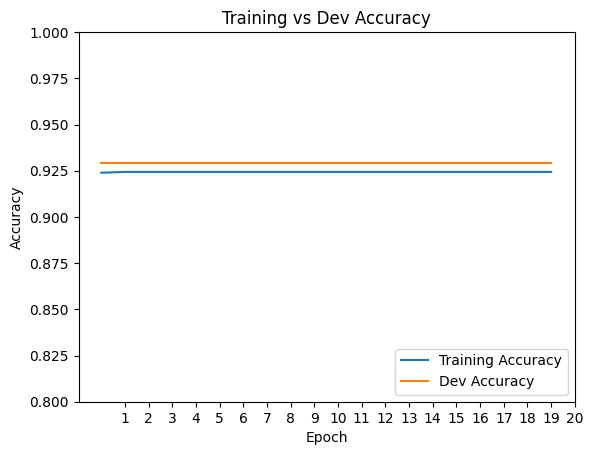

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Dev Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.xticks(range(1, EPOCH_SIZE+1))
plt.legend(loc='lower right')
plt.title('Training vs Dev Accuracy')
plt.savefig('../../result/cnn_model/crude_accuracy.png', format='png')
plt.show();

Training vs Dev Loss

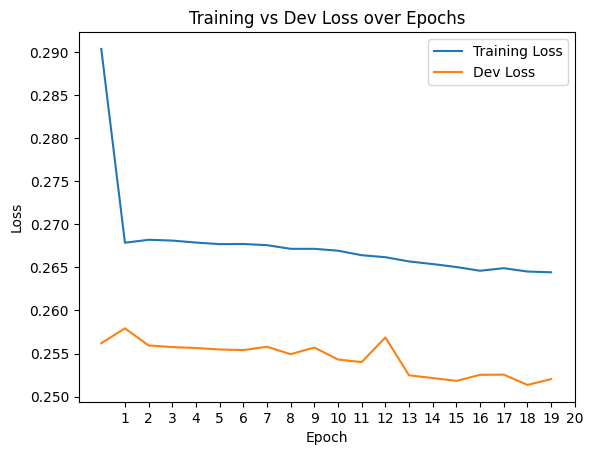

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Dev Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Dev Loss over Epochs')
plt.legend()
plt.xticks(range(1, EPOCH_SIZE+1)) 
plt.savefig('../../result/cnn_model/crude_loss.png', format='png')
plt.show();

In [24]:
# save the trained model
model.save('../../result/cnn_model/crude.h5') 

### ROC curve

In [25]:
# from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
# y_pred_proba = model.predict(X_dev).ravel()
# fpr, tpr, thresholds = roc_curve(Y_dev, y_pred_proba)  # Y_dev contains true labels
# roc_auc = roc_auc_score(Y_dev, y_pred_proba)

# # Plot the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
# plt.xlabel('False Positive Rate', fontsize=12)
# plt.ylabel('True Positive Rate', fontsize=12)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
# plt.legend(loc='lower right', fontsize=10)
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.savefig('../../result/cnn_model/roc_curve.png', format='png', dpi=300)
# plt.show()

## Conclusion

In [27]:
gpus = tf.config.list_physical_devices('GPU')
print("Number of GPUs used:", len(gpus))

Number of GPUs used: 1


In [28]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f"{package.key}=={package.version}")

automat==24.8.1
markdown==3.7
markupsafe==3.0.2
protego==0.3.1
pydispatcher==2.0.7
pyjwt==2.9.0
pysocks==1.7.1
pyyaml==6.0.2
sqlalchemy==2.0.24
scrapy==2.11.2
secretstorage==3.3.3
send2trash==1.8.3
absl-py==2.1.0
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
amqp==5.2.0
annotated-types==0.7.0
anyio==4.6.2.post1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
astroid==3.3.5
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==24.2.0
awscli==1.35.14
babel==2.16.0
beautifulsoup4==4.12.3
billiard==4.2.1
black==24.10.0
bleach==6.1.0
blinker==1.8.2
bokeh==3.6.0
boto3==1.35.48
botocore==1.35.48
build==1.2.2.post1
celery==5.4.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.4.0
click==8.1.7
click-didyoumean==0.3.1
click-plugins==1.1.1
click-repl==0.3.0
cloudpickle==3.1.0
cmake==3.30.5
colorama==0.4.6
comm==0.2.2
constantly==23.10.4
contourpy==1.3.0
cryptography==43.0.3
cssselect==1.2.0
cycler==0.12.1
dask==2024.10.0
debugpy==1.8.7
decorator==5.1.1
defused

/tmp/ipykernel_4704/3885190956.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
